In [126]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model



---

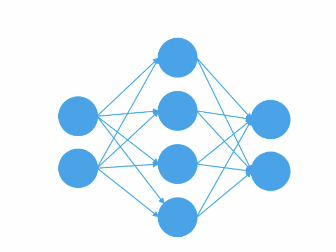

In [127]:
inputA = Input(shape=(2,))
x = Dense(4, activation='relu')(inputA)
x = Dense(2, activation='relu')(x)
x = Model(inputs=inputA, outputs=x)

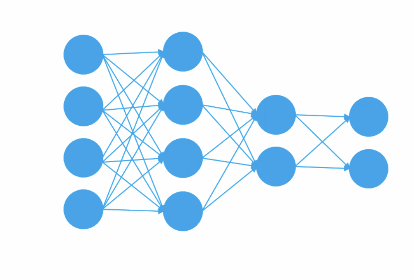

In [128]:
inputB = Input(shape=(4,))
y = Dense(4, activation='relu')(inputB)
y = Dense(2, activation='relu')(y)
y = Dense(2, activation='relu')(y)
y = Model(inputs=inputB, outputs=y)

In [129]:
x.summary()

Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_68 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_149 (Dense)           (None, 4)                 12        
                                                                 
 dense_150 (Dense)           (None, 2)                 10        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [130]:
y.summary()

Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_69 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_151 (Dense)           (None, 4)                 20        
                                                                 
 dense_152 (Dense)           (None, 2)                 10        
                                                                 
 dense_153 (Dense)           (None, 2)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


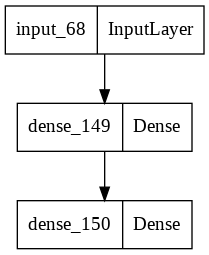

In [131]:
from tensorflow.keras.utils import plot_model
plot_model(x)

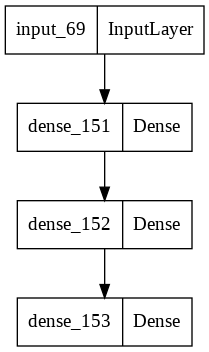

In [132]:
plot_model(y)

: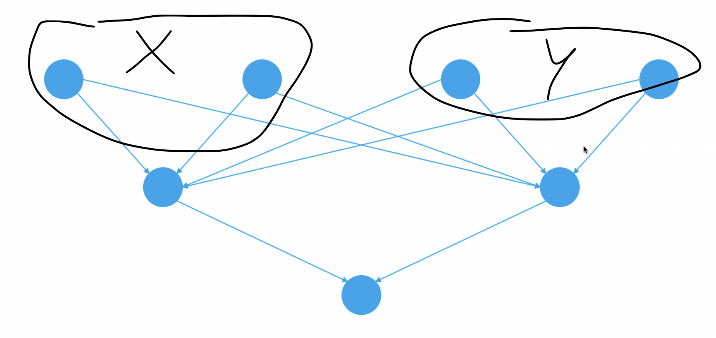

In [133]:
from ast import Mod
result = concatenate([x.output, y.output])
z = Dense(2, activation='relu')(result)
z = Dense(1, activation='linear')(z)

model = Model(inputs=[x.input, y.input], outputs=z)
model.summary()

Model: "model_59"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_69 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 input_68 (InputLayer)          [(None, 2)]          0           []                               
                                                                                                  
 dense_151 (Dense)              (None, 4)            20          ['input_69[0][0]']               
                                                                                                  
 dense_149 (Dense)              (None, 4)            12          ['input_68[0][0]']               
                                                                                           

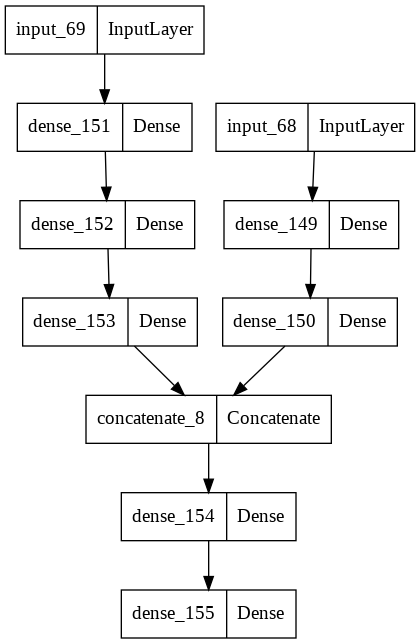

In [134]:
plot_model(model)

# **Xavier** **Initializarion**

In [135]:
import pandas as pd
import numpy as np
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

In [136]:
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense
inputa = Input(shape=(2,))
a = Dense(2, activation='sigmoid')(inputa)
a = Dense(1, activation='sigmoid')(a)
a = Model(inputs=inputa, outputs=a)
aw = a.get_weights()
aw

[array([[-1.1373441, -0.6106821],
        [ 0.8601545, -0.9168598]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0413663],
        [ 0.7004584]], dtype=float32),
 array([0.], dtype=float32)]

In [137]:
np.random.randn(2, 2)

array([[-0.56253318, -1.11986938],
       [-0.38966556, -0.50740234]])

In [138]:
np.sqrt(2)

1.4142135623730951

mean 0.4401176573216923
std 0.4706233822055308


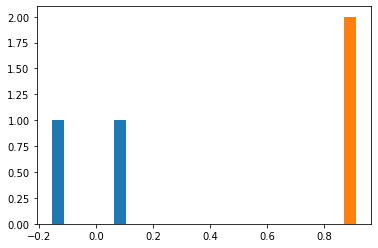

In [139]:
weight_dist = np.random.randn(2, 2)/np.sqrt(2)
print('mean', np.mean(weight_dist))
print('std', np.std(weight_dist))

import matplotlib.pyplot as plt
plt.hist(weight_dist)
plt.show()

mean 0.03545468003995026
std 0.28476884940754094


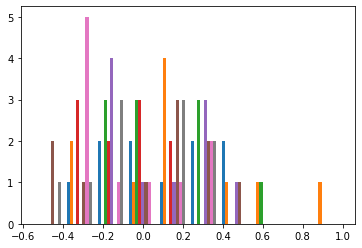

In [140]:
weight_dist = np.random.randn(10, 8)/np.sqrt(10)
print('mean', np.mean(weight_dist))
print('std', np.std(weight_dist))

import matplotlib.pyplot as plt
plt.hist(weight_dist)
plt.show()

mean -0.00872854129015772
std 0.21904659226726683


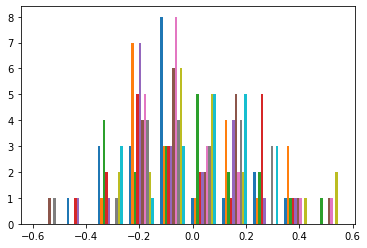

In [141]:
weight_dist = np.random.randn(20, 10)/np.sqrt(20)
print('mean', np.mean(weight_dist))
print('std', np.std(weight_dist))

import matplotlib.pyplot as plt
plt.hist(weight_dist)
plt.show()

In [142]:
import pandas as pd
import numpy as np
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

inputa = Input(shape=(2,))
a = Dense(2, activation='sigmoid')(inputa)
a = Dense(1, activation='linear')(a)
a = Model(inputs=inputa, outputs=a)

a.compile(loss='mse', optimizer='rmsprop')
a.fit(X,y, epochs=1500, verbose=0)
a.predict(X)


1/1 [==============================] - 0s 105ms/step


array([[0.29878992],
       [0.7856399 ],
       [0.37830523],
       [0.5398741 ]], dtype=float32)

In [143]:
#Xavier initialization sigmoid

import pandas as pd
import numpy as np
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

inputa = Input(shape=(2,))
a = Dense(2, activation='sigmoid')(inputa)
a = Dense(1, activation='linear')(a)
a = Model(inputs=inputa, outputs=a)
aw = a.get_weights()

xavier_w12 = np.random.randn(2, 2)/np.sqrt(2)
xavier_w23 = np.random.randn(2, 1)/np.sqrt(2)
xavier_weight = aw.copy()
xavier_weight[0] = xavier_w12
xavier_weight[2] = xavier_w23
a.set_weights(xavier_weight)

a.compile(loss='mse', optimizer='rmsprop')
a.fit(X,y, epochs=1500, verbose=0)
a.predict(X)

1/1 [==============================] - 0s 51ms/step


array([[0.16817445],
       [0.49387148],
       [0.736541  ],
       [0.60410464]], dtype=float32)

In [144]:
#Xavier initialization relu

import pandas as pd
import numpy as np
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

inputa = Input(shape=(2,))
a = Dense(2, activation='relu')(inputa)
a = Dense(1, activation='linear')(a)
a = Model(inputs=inputa, outputs=a)
aw = a.get_weights()

xavier_w12 = np.random.randn(2, 2)/np.sqrt(2)
xavier_w23 = np.random.randn(2, 1)/np.sqrt(2)
xavier_weight = aw.copy()
xavier_weight[0] = xavier_w12
xavier_weight[2] = xavier_w23
a.set_weights(xavier_weight)

a.compile(loss='mse', optimizer='rmsprop')
a.fit(X,y, epochs=1500, verbose=0)
a.predict(X)

1/1 [==============================] - 0s 53ms/step


array([[0.3328339 ],
       [0.99815464],
       [0.3328339 ],
       [0.3328339 ]], dtype=float32)

In [145]:
# 강사님 코드 Xavier initialization sigmoid

xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y
ip = Input(shape=(2,))
n = Dense(2, activation='sigmoid')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)
weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2)
xavier_w23 = np.random.randn(2, 1) / np.sqrt(2)
xavier_weights = weights.copy()
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w23
model.set_weights(xavier_weights)
model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=1400, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 58ms/step


array([[0.32618466],
       [0.6049361 ],
       [0.60821056],
       [0.4593551 ]], dtype=float32)

In [146]:
# He initialization relu

xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y
ip = Input(shape=(2,))
n = Dense(2, activation='relu')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)
weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2/2)
xavier_w23 = np.random.randn(2, 1) / np.sqrt(2/2)
xavier_weights = weights.copy()
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w23
model.set_weights(xavier_weights)
model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=2000, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 45ms/step


array([[0.49922585],
       [0.49913657],
       [0.49913657],
       [0.49904725]], dtype=float32)

In [147]:
# He initialization sigmoid

xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y
ip = Input(shape=(2,))
n = Dense(2, activation='sigmoid')(ip)
n = Dense(1, activation='linear')(n)
model = Model(inputs=ip, outputs=n)
weights = model.get_weights()
xavier_w12 = np.random.randn(2, 2) / np.sqrt(2/2)
xavier_w23 = np.random.randn(2, 1) / np.sqrt(2/2)
xavier_weights = weights.copy()
xavier_weights[0] = xavier_w12
xavier_weights[2] = xavier_w23
model.set_weights(xavier_weights)
model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=2000, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 56ms/step


array([[0.07300426],
       [0.68707305],
       [0.816302  ],
       [0.42221785]], dtype=float32)

In [151]:
import tensorflow as tf

In [155]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
initializer = tf.keras.initializers.Zeros()
initializer = tf.keras.initializers.Ones()
initializer = tf.keras.initializers.GlorotNormal() #Xavier
initializer = tf.keras.initializers.GlorotUniform() #Xavier
initializer = tf.keras.initializers.HeNormal() #He
initializer = tf.keras.initializers.HeUniform() #He

layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

In [160]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y
ip = initializer(shape=(2,2))
layer = tf.keras.layers.Dense(2, kernel_initializer=initializer)
layer = tf.keras.layers.Dense(1, kernel_initializer=initializer)

model = Model(inputs=ip, outputs=layer)
# weights = model.get_weights()
# xavier_w12 = np.random.randn(2, 2) / np.sqrt(2/2)
# xavier_w23 = np.random.randn(2, 1) / np.sqrt(2/2)
# xavier_weights = weights.copy()
# xavier_weights[0] = xavier_w12
# xavier_weights[2] = xavier_w23
# model.set_weights(xavier_weights)
model.compile(loss='mse', optimizer='rmsprop')
model.fit(X, y, epochs=2000, verbose=0)
model.predict(X)

ValueError: ignored

In [ ]:
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice(initializer, activation, epochs, optimizer):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    ip = Input(shape=(2,))
    n = Dense(2, activation=activation, kernel_initializer=initializer)(ip)
    n = Dense(1, activation='linear', kernel_initializer=initializer)(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
    loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    loss_ax.set_ylim(0, 1)
    plt.show()
    return model.predict(X)


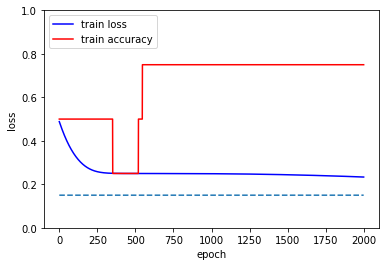

1/1 [==============================] - 0s 60ms/step
[[0.42363742]
 [0.5295225 ]
 [0.5298883 ]
 [0.5583839 ]]


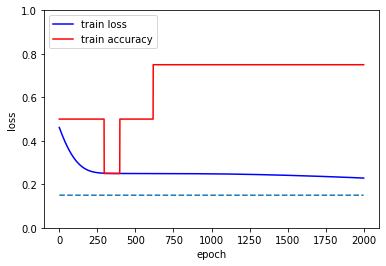

1/1 [==============================] - 0s 47ms/step
[[0.3811577 ]
 [0.5413068 ]
 [0.53881025]
 [0.58844143]]


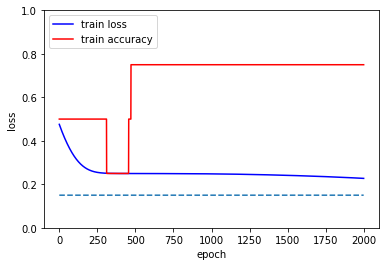

1/1 [==============================] - 0s 45ms/step
[[0.374603  ]
 [0.5419801 ]
 [0.5421869 ]
 [0.59106094]]


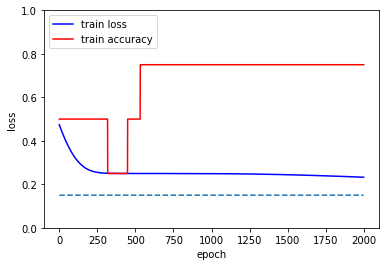

1/1 [==============================] - 0s 54ms/step
[[0.39834988]
 [0.5331795 ]
 [0.53415906]
 [0.57993174]]


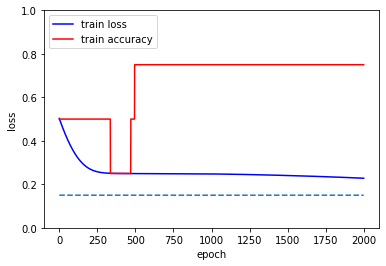

1/1 [==============================] - 0s 48ms/step
[[0.381951 ]
 [0.5423684]
 [0.5415453]
 [0.5881919]]


In [193]:
# RandomNormal sigmoid
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

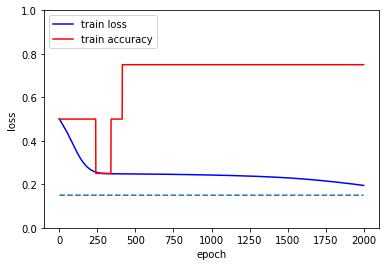

1/1 [==============================] - 0s 52ms/step
[[0.14571299]
 [0.5863601 ]
 [0.5939645 ]
 [0.64939296]]


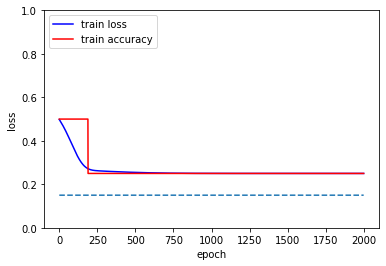

1/1 [==============================] - 0s 49ms/step
[[0.4999957 ]
 [0.4999994 ]
 [0.49999946]
 [0.50000316]]


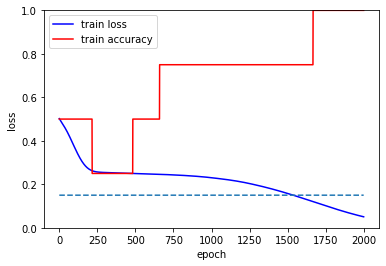

1/1 [==============================] - 0s 56ms/step
[[0.14445974]
 [0.82209134]
 [0.8218725 ]
 [0.3428703 ]]


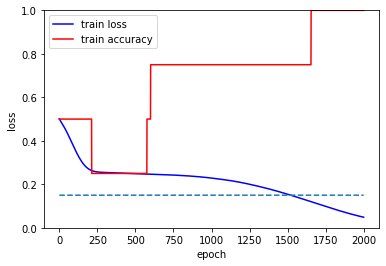

1/1 [==============================] - 0s 78ms/step
[[0.1398482]
 [0.8253354]
 [0.8250548]
 [0.3365635]]


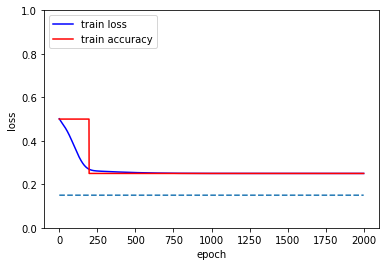

1/1 [==============================] - 0s 65ms/step
[[0.4999985 ]
 [0.49999964]
 [0.4999997 ]
 [0.50000083]]


In [194]:
# RandomNormal elu
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

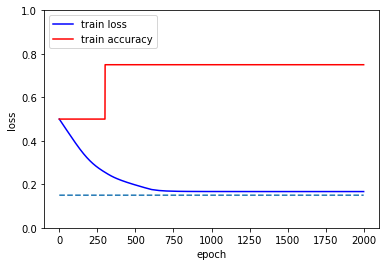

1/1 [==============================] - 0s 47ms/step
[[0.33336958]
 [0.33336958]
 [0.9999888 ]
 [0.33336958]]


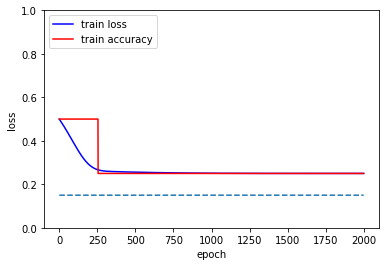

1/1 [==============================] - 0s 46ms/step
[[0.49922246]
 [0.49989325]
 [0.49990863]
 [0.5005794 ]]


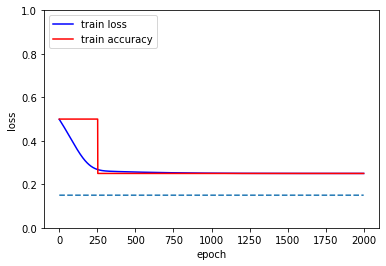

1/1 [==============================] - 0s 46ms/step
[[0.4988175 ]
 [0.49983865]
 [0.49986666]
 [0.5008878 ]]


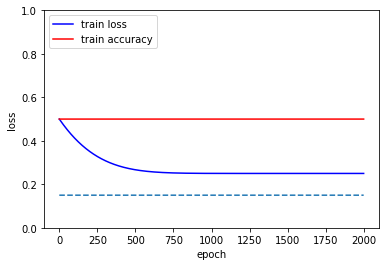

1/1 [==============================] - 0s 47ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


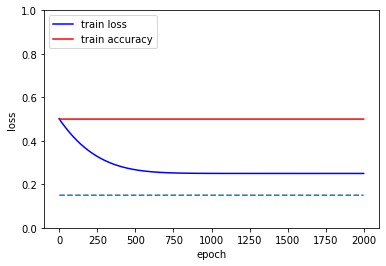

1/1 [==============================] - 0s 52ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


In [195]:
# RandomNormal relu
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

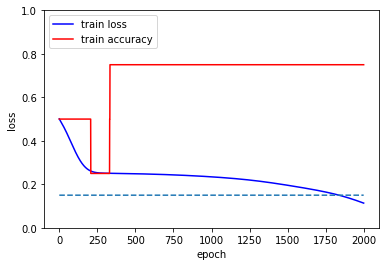

1/1 [==============================] - 0s 54ms/step
[[0.12369022]
 [0.7072764 ]
 [0.70700645]
 [0.5162253 ]]


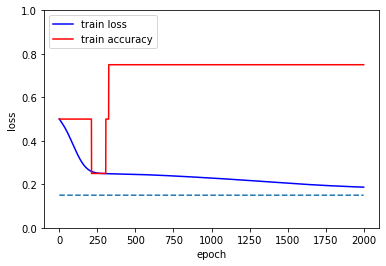

1/1 [==============================] - 0s 51ms/step
[[0.11200611]
 [0.62563795]
 [0.62418944]
 [0.67353517]]


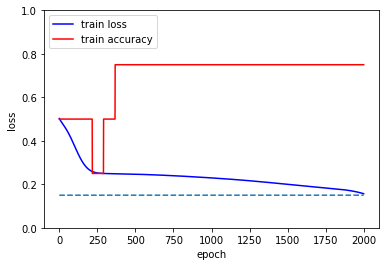

1/1 [==============================] - 0s 51ms/step
[[0.08672661]
 [0.6465282 ]
 [0.65492237]
 [0.61205727]]


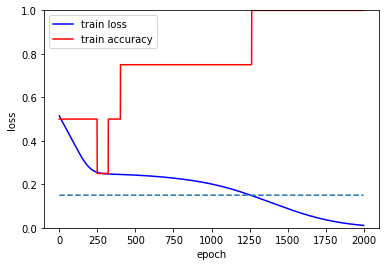

1/1 [==============================] - 0s 52ms/step
[[0.10239691]
 [0.92420596]
 [0.92417103]
 [0.146725  ]]


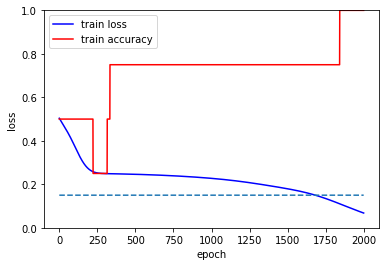

1/1 [==============================] - 0s 45ms/step
[[0.15093975]
 [0.78310883]
 [0.78383636]
 [0.39263928]]


In [196]:
# RandomNormal Hyperbolic tangent
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

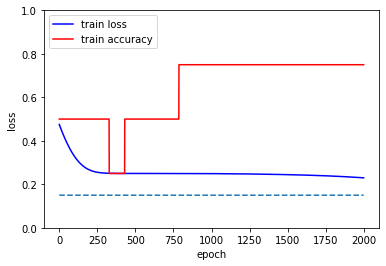

1/1 [==============================] - 0s 54ms/step
[[0.39865458]
 [0.5346423 ]
 [0.5345841 ]
 [0.5719078 ]]


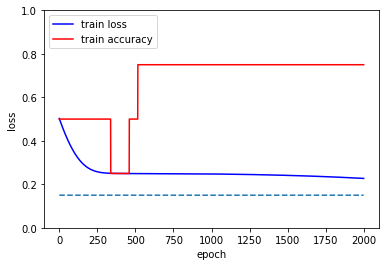

1/1 [==============================] - 0s 45ms/step
[[0.37712535]
 [0.54129106]
 [0.5405631 ]
 [0.58714956]]


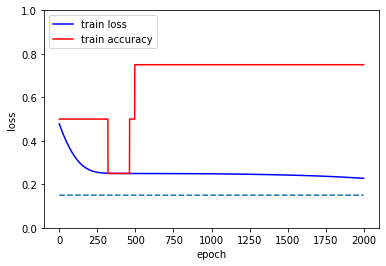

1/1 [==============================] - 0s 44ms/step
[[0.37401676]
 [0.5381849 ]
 [0.5385386 ]
 [0.586624  ]]


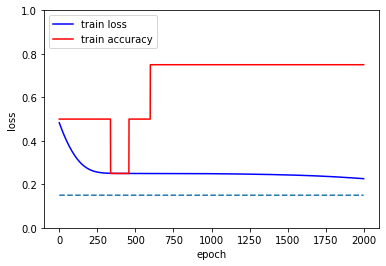

1/1 [==============================] - 0s 47ms/step
[[0.39436984]
 [0.54201883]
 [0.54085296]
 [0.57207143]]


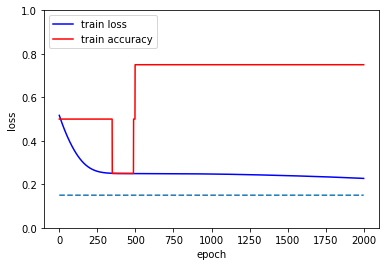

1/1 [==============================] - 0s 45ms/step
[[0.37969136]
 [0.54354507]
 [0.54361135]
 [0.58957726]]


In [197]:
# RandomUniform sigmoid
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

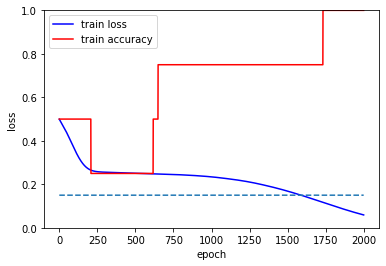

1/1 [==============================] - 0s 46ms/step
[[0.14882821]
 [0.80511814]
 [0.804763  ]
 [0.3710699 ]]


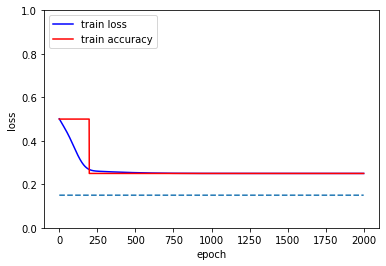

1/1 [==============================] - 0s 48ms/step
[[0.49999905]
 [0.49999976]
 [0.49999976]
 [0.5000005 ]]


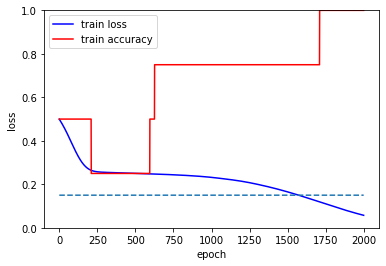

1/1 [==============================] - 0s 47ms/step
[[0.1526918]
 [0.8088478]
 [0.8088561]
 [0.3643723]]


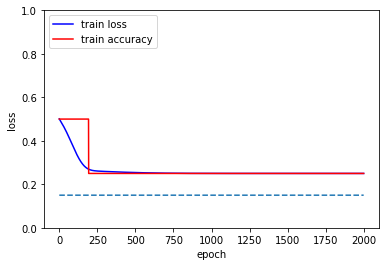

1/1 [==============================] - 0s 53ms/step
[[0.4999972 ]
 [0.49999958]
 [0.49999958]
 [0.50000197]]


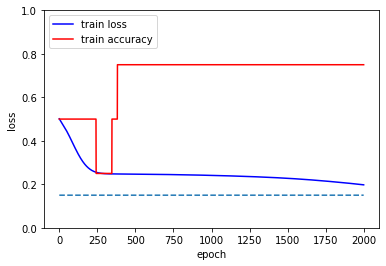

1/1 [==============================] - 0s 45ms/step
[[0.13834494]
 [0.58685863]
 [0.58955497]
 [0.6572039 ]]


In [198]:
# RandomUniform elu
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

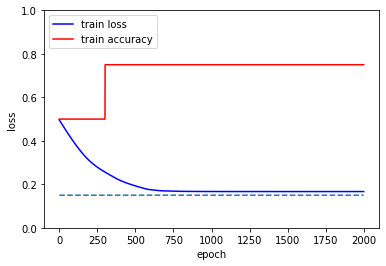

1/1 [==============================] - 0s 46ms/step
[[0.3333962]
 [0.3333962]
 [0.9999791]
 [0.3333962]]


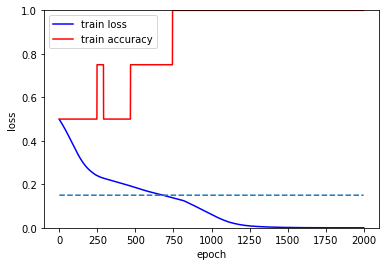

1/1 [==============================] - 0s 45ms/step
[[0.00566177]
 [0.9982318 ]
 [0.99799806]
 [0.00566177]]


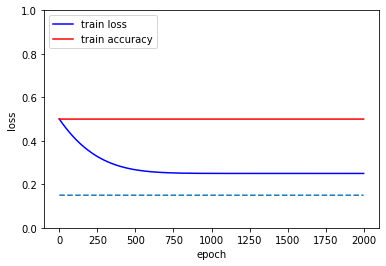

1/1 [==============================] - 0s 53ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


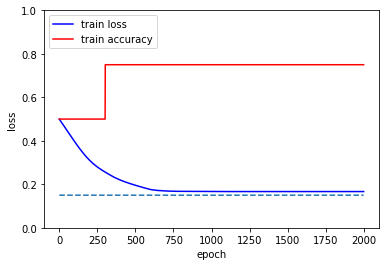

1/1 [==============================] - 0s 46ms/step
[[0.3333698]
 [0.9999884]
 [0.3333698]
 [0.3333698]]


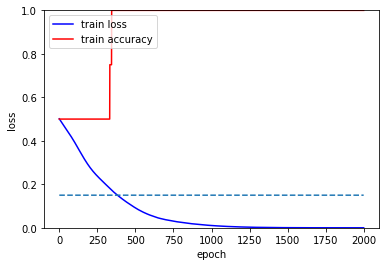

1/1 [==============================] - 0s 48ms/step
[[0.00389593]
 [0.99900264]
 [0.99899393]
 [0.00390024]]


In [199]:
# RandomUniform relu
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

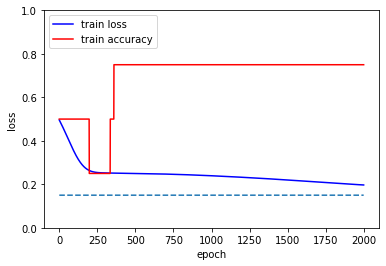

1/1 [==============================] - 0s 49ms/step
[[0.17412405]
 [0.604414  ]
 [0.6051354 ]
 [0.6671119 ]]


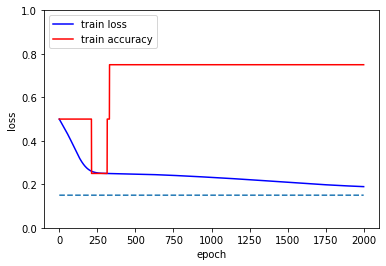

1/1 [==============================] - 0s 60ms/step
[[0.12699403]
 [0.620399  ]
 [0.6197349 ]
 [0.6725766 ]]


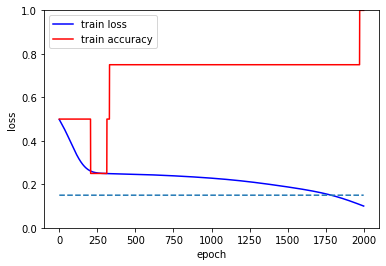

1/1 [==============================] - 0s 49ms/step
[[0.12971488]
 [0.7261118 ]
 [0.72843283]
 [0.4831081 ]]


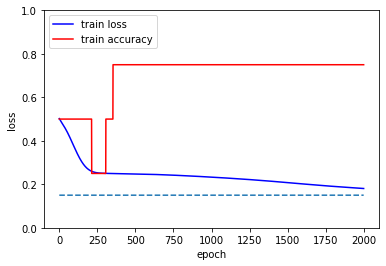

1/1 [==============================] - 0s 53ms/step
[[0.08883335]
 [0.62789696]
 [0.62583125]
 [0.6606455 ]]


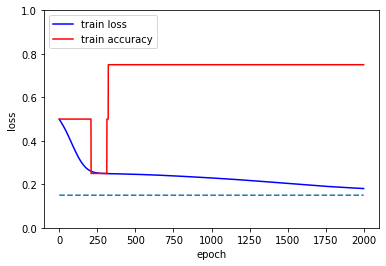

1/1 [==============================] - 0s 51ms/step
[[0.08198866]
 [0.6307816 ]
 [0.628002  ]
 [0.6637658 ]]


In [200]:
# RandomUniform tanh
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

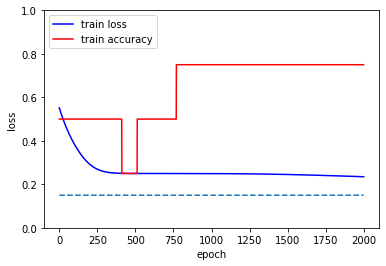

1/1 [==============================] - 0s 57ms/step
[[0.41447517]
 [0.5304611 ]
 [0.5324483 ]
 [0.5726131 ]]


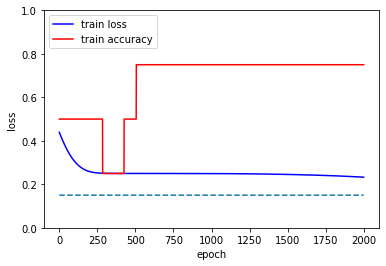

1/1 [==============================] - 0s 46ms/step
[[0.391685  ]
 [0.531674  ]
 [0.53094655]
 [0.5816046 ]]


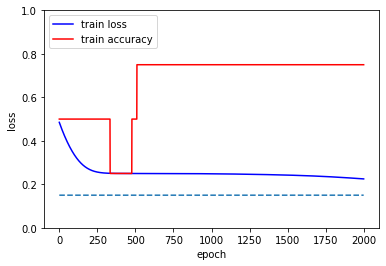

1/1 [==============================] - 0s 51ms/step
[[0.3856067 ]
 [0.54227585]
 [0.5434996 ]
 [0.57673246]]


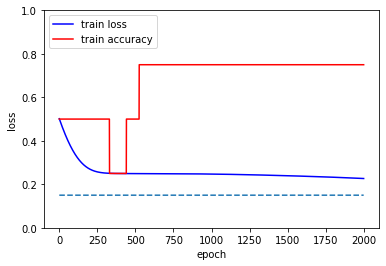

1/1 [==============================] - 0s 60ms/step
[[0.37648273]
 [0.5429228 ]
 [0.5450262 ]
 [0.59071296]]


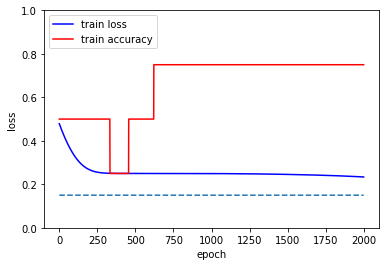

1/1 [==============================] - 0s 46ms/step
[[0.40037826]
 [0.5305618 ]
 [0.5285207 ]
 [0.57616717]]


In [201]:
# TruncatedNormal sigmoid
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

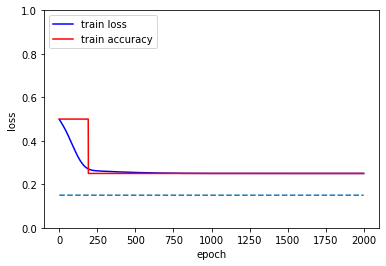

1/1 [==============================] - 0s 50ms/step
[[0.4999968 ]
 [0.49999955]
 [0.49999964]
 [0.5000024 ]]


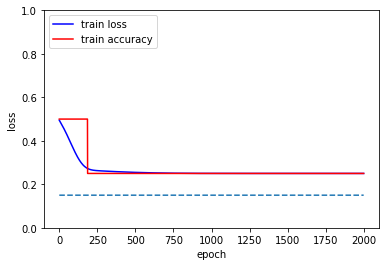

1/1 [==============================] - 0s 45ms/step
[[0.49999723]
 [0.4999996 ]
 [0.49999967]
 [0.500002  ]]


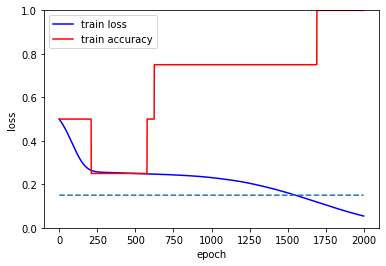

1/1 [==============================] - 0s 45ms/step
[[0.14820969]
 [0.8163482 ]
 [0.81643397]
 [0.35537815]]


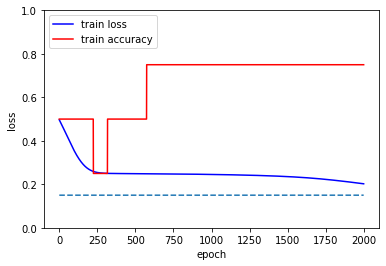

1/1 [==============================] - 0s 48ms/step
[[0.17848693]
 [0.57522595]
 [0.58157533]
 [0.6494474 ]]


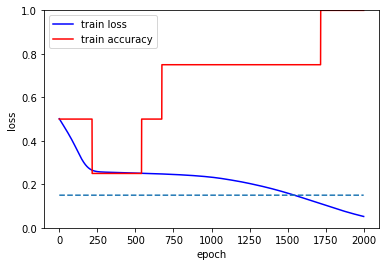

1/1 [==============================] - 0s 57ms/step
[[0.1314328 ]
 [0.8227144 ]
 [0.8231994 ]
 [0.35750905]]


In [202]:
# TruncatedNormal elu
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

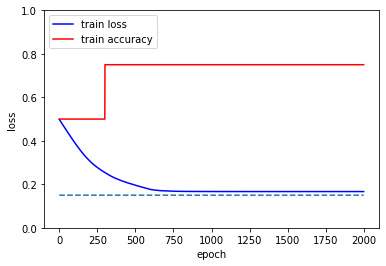

1/1 [==============================] - 0s 53ms/step
[[0.33336398]
 [0.33336398]
 [0.99999034]
 [0.33336398]]


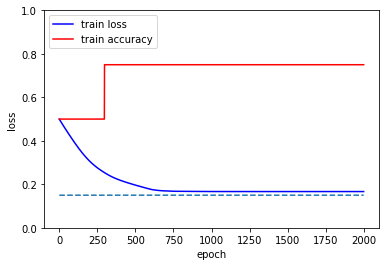

1/1 [==============================] - 0s 62ms/step
[[0.3333823 ]
 [0.3333823 ]
 [0.99998456]
 [0.3333823 ]]


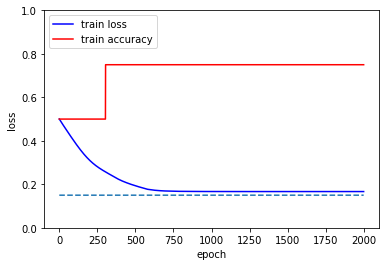

1/1 [==============================] - 0s 45ms/step
[[0.33338422]
 [0.99998313]
 [0.33338422]
 [0.33338422]]


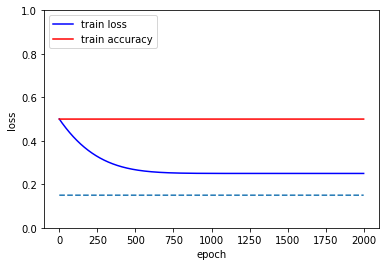

1/1 [==============================] - 0s 48ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


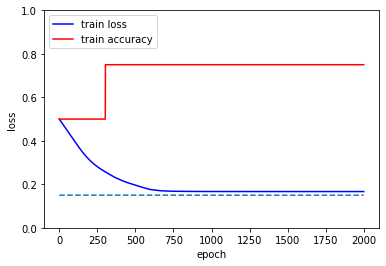

1/1 [==============================] - 0s 54ms/step
[[0.3333777 ]
 [0.99998605]
 [0.3333777 ]
 [0.3333777 ]]


In [203]:
# TruncatedNormal relu
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

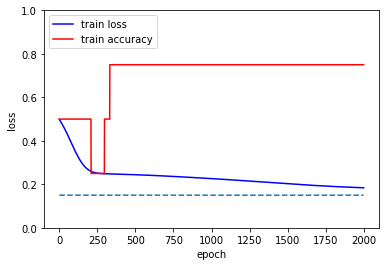

1/1 [==============================] - 0s 61ms/step
[[0.09397844]
 [0.6297768 ]
 [0.62547976]
 [0.670627  ]]


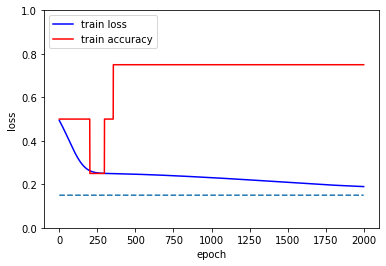

1/1 [==============================] - 0s 45ms/step
[[0.1274836 ]
 [0.62097657]
 [0.6175385 ]
 [0.6723964 ]]


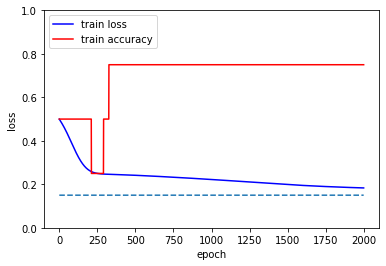

1/1 [==============================] - 0s 51ms/step
[[0.09044836]
 [0.6297987 ]
 [0.6323    ]
 [0.6729909 ]]


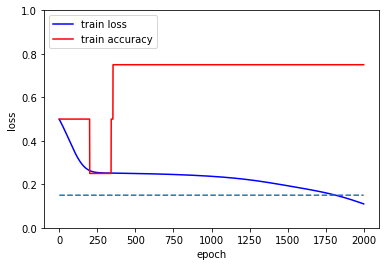

1/1 [==============================] - 0s 55ms/step
[[0.12655585]
 [0.71076334]
 [0.7123711 ]
 [0.50643075]]


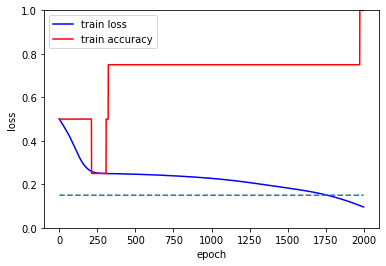

1/1 [==============================] - 0s 52ms/step
[[0.10249119]
 [0.735971  ]
 [0.73876524]
 [0.48305508]]


In [204]:
# TruncatedNormal tanh
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

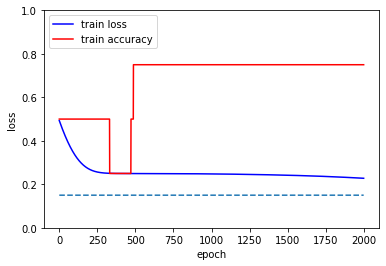

1/1 [==============================] - 0s 60ms/step
[[0.3785028 ]
 [0.53841376]
 [0.5379747 ]
 [0.58411133]]


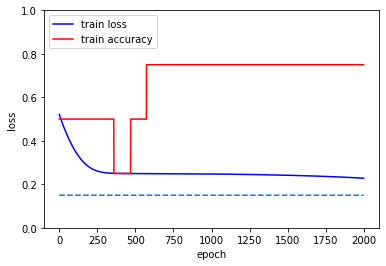

1/1 [==============================] - 0s 53ms/step
[[0.38447696]
 [0.53774655]
 [0.5346909 ]
 [0.5785454 ]]


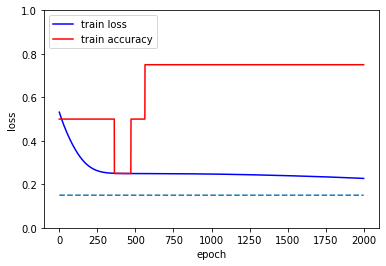

1/1 [==============================] - 0s 51ms/step
[[0.38088208]
 [0.5452207 ]
 [0.5426331 ]
 [0.58916205]]


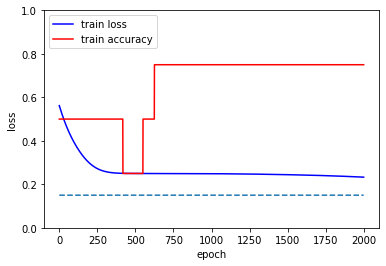

1/1 [==============================] - 0s 45ms/step
[[0.40591937]
 [0.5326623 ]
 [0.5299238 ]
 [0.57223535]]


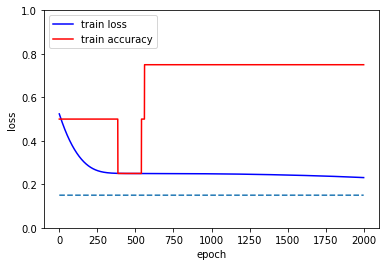

1/1 [==============================] - 0s 45ms/step
[[0.4185238]
 [0.5340058]
 [0.53419  ]
 [0.560493 ]]


In [205]:
# Zeros sigmoid
initializer = tf.keras.initializers.Zeros()
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

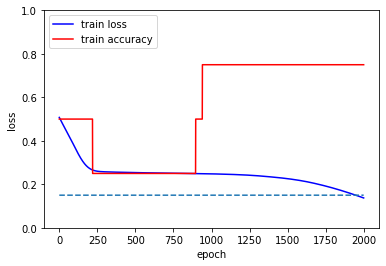

1/1 [==============================] - 0s 44ms/step
[[0.25007233]
 [0.6813993 ]
 [0.6809935 ]
 [0.5315261 ]]


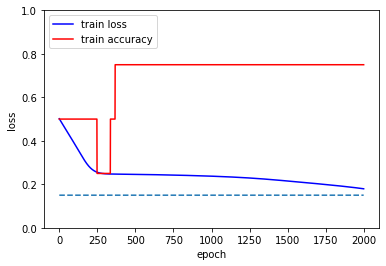

1/1 [==============================] - 0s 54ms/step
[[0.09692407]
 [0.6172792 ]
 [0.6251721 ]
 [0.64879537]]


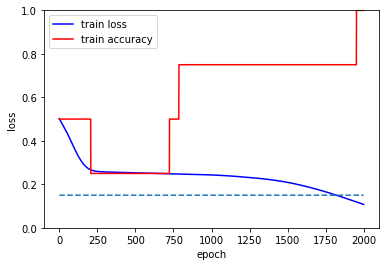

1/1 [==============================] - 0s 55ms/step
[[0.22293054]
 [0.725989  ]
 [0.7265838 ]
 [0.47974086]]


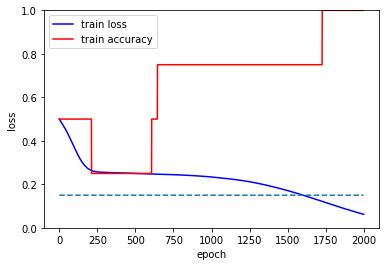

1/1 [==============================] - 0s 52ms/step
[[0.1657066 ]
 [0.8007575 ]
 [0.80071557]
 [0.37570313]]


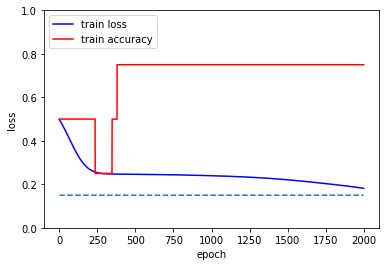

1/1 [==============================] - 0s 54ms/step
[[0.11802892]
 [0.61358255]
 [0.6081884 ]
 [0.6396338 ]]


In [206]:
# Zeros elu
initializer = tf.keras.initializers.Zeros()
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

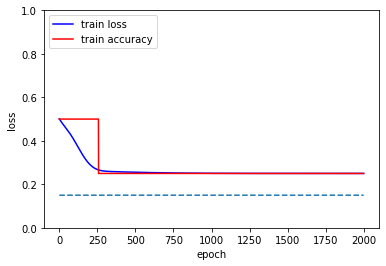

1/1 [==============================] - 0s 46ms/step
[[0.4997242 ]
 [0.49996656]
 [0.49995905]
 [0.5002014 ]]


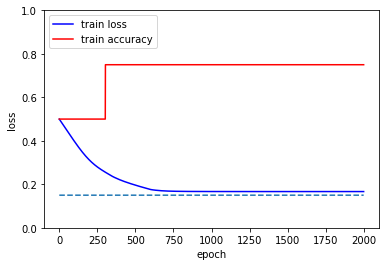

1/1 [==============================] - 0s 56ms/step
[[0.33336356]
 [0.9999906 ]
 [0.33336356]
 [0.33336356]]


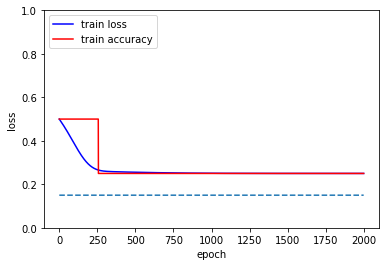

1/1 [==============================] - 0s 46ms/step
[[0.49942878]
 [0.49992472]
 [0.49992704]
 [0.500423  ]]


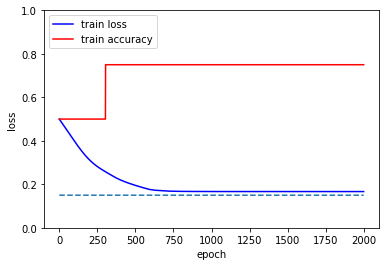

1/1 [==============================] - 0s 61ms/step
[[0.33337358]
 [0.33337358]
 [0.9999875 ]
 [0.33337358]]


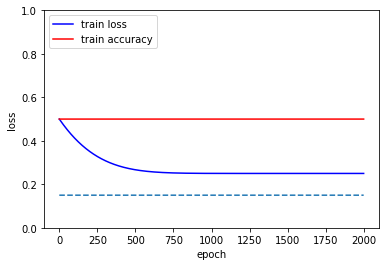

1/1 [==============================] - 0s 56ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


In [207]:
# Zeros relu
initializer = tf.keras.initializers.Zeros()
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

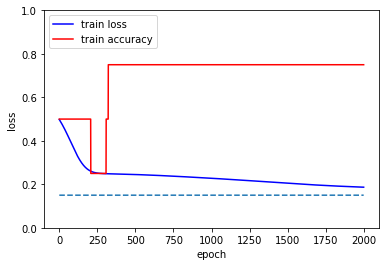

1/1 [==============================] - 0s 53ms/step
[[0.11045132]
 [0.6248897 ]
 [0.6237467 ]
 [0.67259836]]


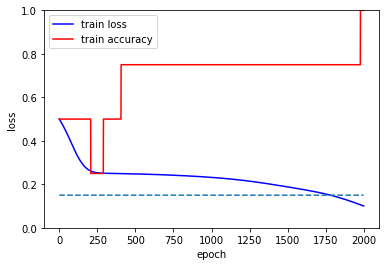

1/1 [==============================] - 0s 59ms/step
[[0.12269795]
 [0.722656  ]
 [0.73241353]
 [0.48631704]]


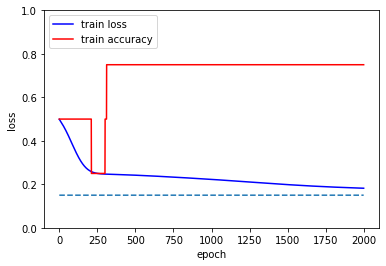

1/1 [==============================] - 0s 51ms/step
[[0.08309422]
 [0.63200116]
 [0.6307605 ]
 [0.67026895]]


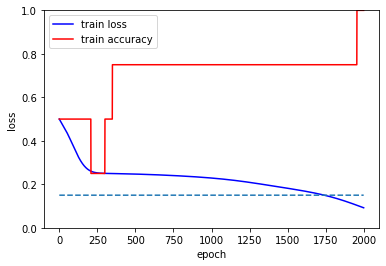

1/1 [==============================] - 0s 46ms/step
[[0.10941605]
 [0.74421334]
 [0.73935556]
 [0.47126582]]


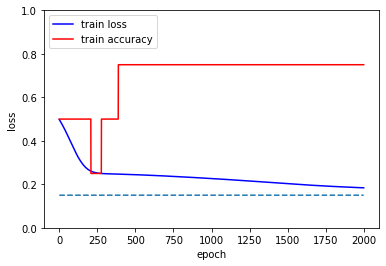

1/1 [==============================] - 0s 52ms/step
[[0.09317228]
 [0.63216984]
 [0.62315375]
 [0.6705281 ]]


In [208]:
# Zeros tanh
initializer = tf.keras.initializers.Zeros()
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

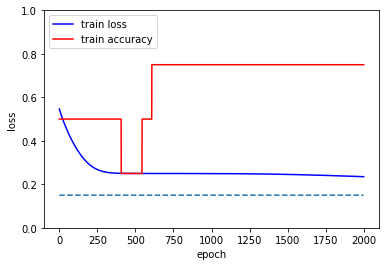

1/1 [==============================] - 0s 47ms/step
[[0.41503072]
 [0.5303476 ]
 [0.5308347 ]
 [0.5719243 ]]


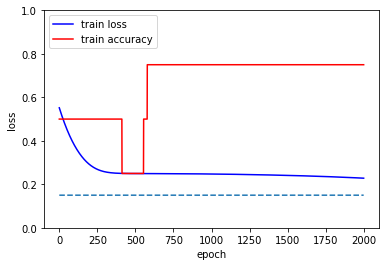

1/1 [==============================] - 0s 55ms/step
[[0.40668553]
 [0.5386627 ]
 [0.5392101 ]
 [0.5674684 ]]


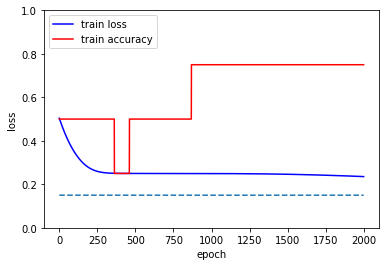

1/1 [==============================] - 0s 52ms/step
[[0.41090566]
 [0.53022325]
 [0.5285251 ]
 [0.57445437]]


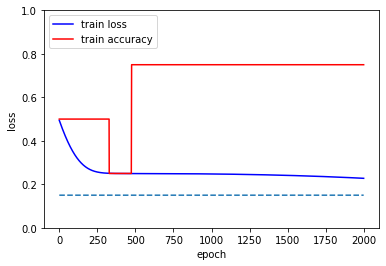

1/1 [==============================] - 0s 47ms/step
[[0.37891173]
 [0.540249  ]
 [0.5404653 ]
 [0.5866355 ]]


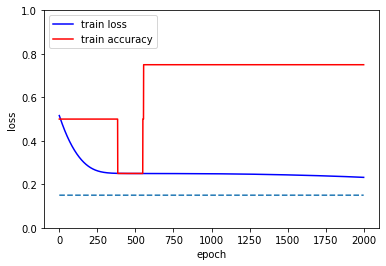

1/1 [==============================] - 0s 53ms/step
[[0.42426422]
 [0.5323845 ]
 [0.53227264]
 [0.55706644]]


In [209]:
# Ones sigmoid
initializer = tf.keras.initializers.Ones()
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

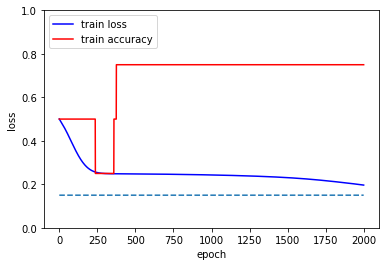

1/1 [==============================] - 0s 60ms/step
[[0.14424516]
 [0.5908659 ]
 [0.58753306]
 [0.65355396]]


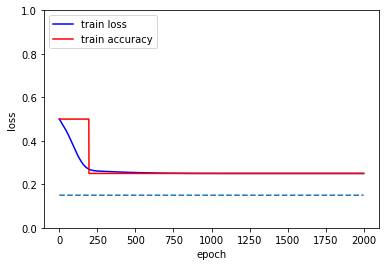

1/1 [==============================] - 0s 52ms/step
[[0.49999827]
 [0.49999964]
 [0.49999976]
 [0.50000113]]


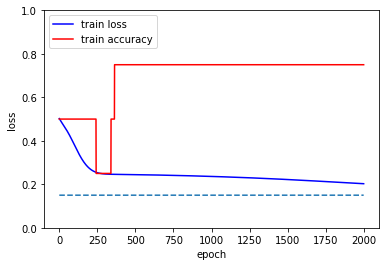

1/1 [==============================] - 0s 54ms/step
[[0.13753852]
 [0.5904796 ]
 [0.5918605 ]
 [0.6765544 ]]


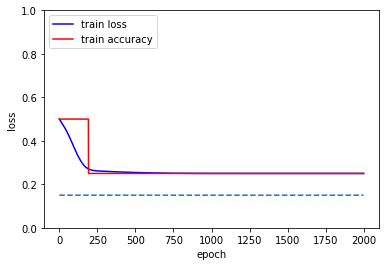

1/1 [==============================] - 0s 55ms/step
[[0.4999978 ]
 [0.49999964]
 [0.49999964]
 [0.50000155]]


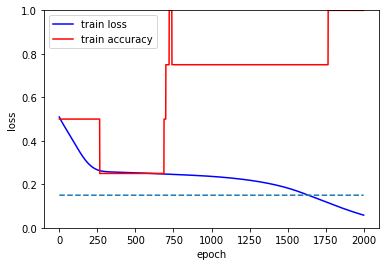

1/1 [==============================] - 0s 54ms/step
[[0.373603  ]
 [0.8169988 ]
 [0.8167559 ]
 [0.15954697]]


In [210]:
# Ones elu
initializer = tf.keras.initializers.Ones()
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

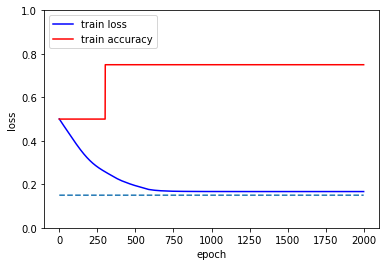

1/1 [==============================] - 0s 47ms/step
[[0.33338818]
 [0.9999821 ]
 [0.33338818]
 [0.33338818]]


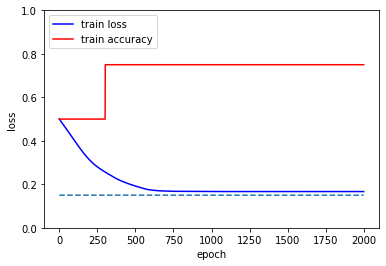

1/1 [==============================] - 0s 48ms/step
[[0.33337012]
 [0.33337012]
 [0.99998844]
 [0.33337012]]


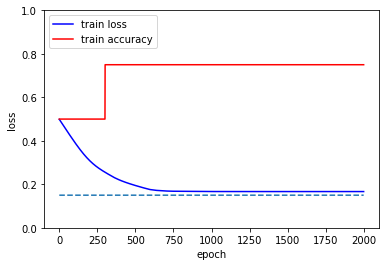

1/1 [==============================] - 0s 46ms/step
[[0.33338365]
 [0.99998367]
 [0.33338365]
 [0.33338365]]


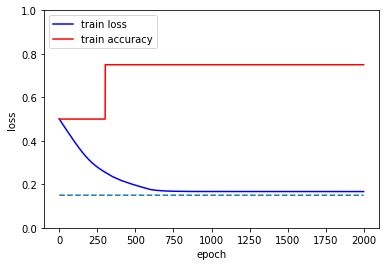

1/1 [==============================] - 0s 58ms/step
[[0.33338466]
 [0.33338466]
 [0.99998367]
 [0.33338466]]


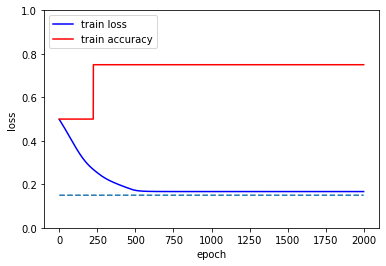

1/1 [==============================] - 0s 47ms/step
[[0.3333317]
 [1.0000011]
 [0.3333317]
 [0.3333317]]


In [211]:
# Ones relu
initializer = tf.keras.initializers.Ones()
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

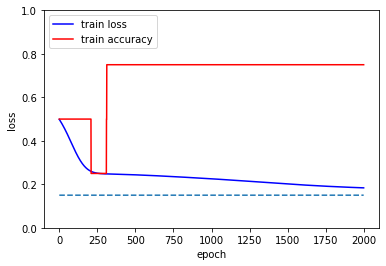

1/1 [==============================] - 0s 46ms/step
[[0.09229464]
 [0.6295674 ]
 [0.62738365]
 [0.6709579 ]]


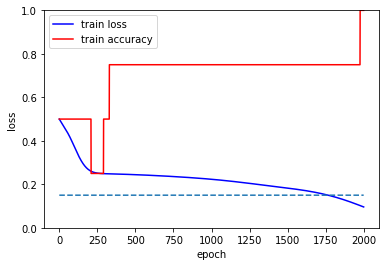

1/1 [==============================] - 0s 49ms/step
[[0.10296945]
 [0.73454154]
 [0.74068964]
 [0.48398712]]


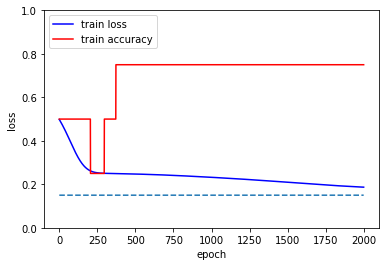

1/1 [==============================] - 0s 54ms/step
[[0.11074125]
 [0.6240281 ]
 [0.61857593]
 [0.6694597 ]]


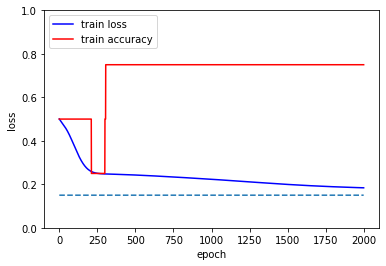

1/1 [==============================] - 0s 55ms/step
[[0.09437503]
 [0.63087225]
 [0.6308685 ]
 [0.6739397 ]]


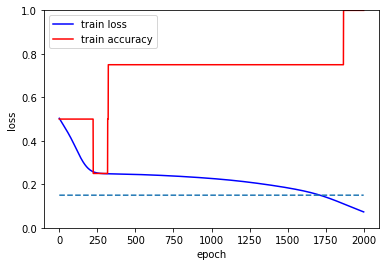

1/1 [==============================] - 0s 49ms/step
[[0.15359043]
 [0.77391   ]
 [0.7738542 ]
 [0.4070924 ]]


In [212]:
# Ones tanh
initializer = tf.keras.initializers.Ones()
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

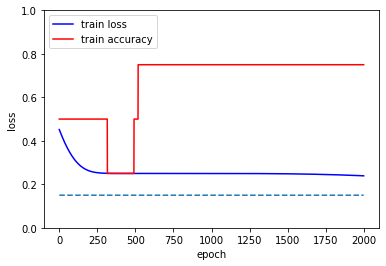

1/1 [==============================] - 0s 54ms/step
[[0.43801147]
 [0.52031624]
 [0.51997685]
 [0.5509337 ]]


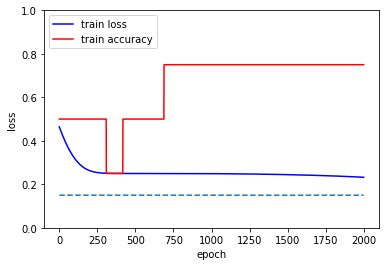

1/1 [==============================] - 0s 53ms/step
[[0.3946756]
 [0.5312823]
 [0.5303711]
 [0.5772698]]


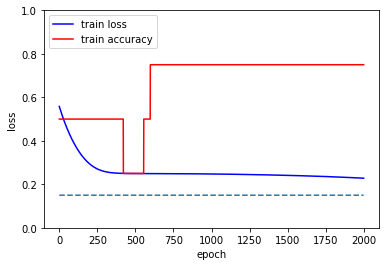

1/1 [==============================] - 0s 52ms/step
[[0.40765923]
 [0.53971064]
 [0.538798  ]
 [0.56712234]]


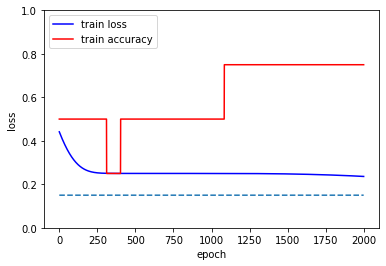

1/1 [==============================] - 0s 49ms/step
[[0.44393557]
 [0.5246032 ]
 [0.52519   ]
 [0.5440494 ]]


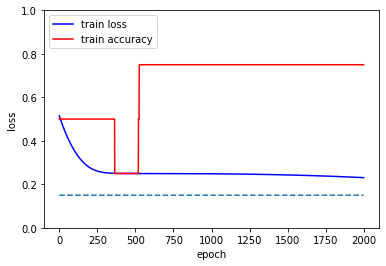

1/1 [==============================] - 0s 49ms/step
[[0.41456613]
 [0.53419787]
 [0.53413355]
 [0.5623436 ]]


In [213]:
# GlorotNormal sigmoid
initializer = tf.keras.initializers.GlorotNormal() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

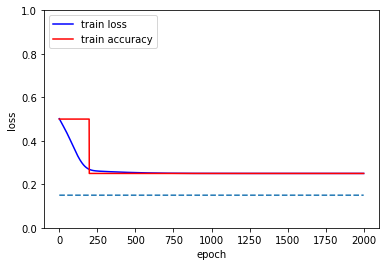

1/1 [==============================] - 0s 56ms/step
[[0.4999985 ]
 [0.4999997 ]
 [0.49999976]
 [0.50000095]]


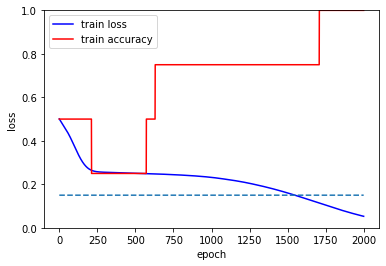

1/1 [==============================] - 0s 56ms/step
[[0.13845722]
 [0.8205757 ]
 [0.82030463]
 [0.3566277 ]]


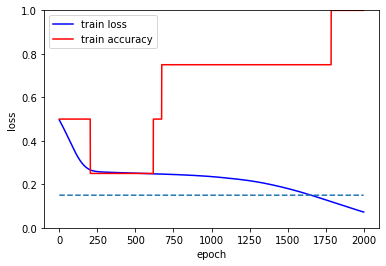

1/1 [==============================] - 0s 55ms/step
[[0.17533568]
 [0.78049153]
 [0.78018   ]
 [0.40322837]]


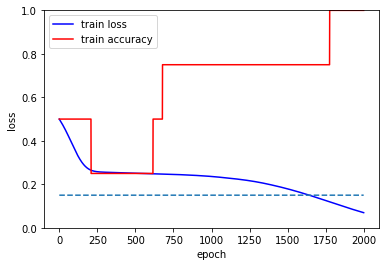

1/1 [==============================] - 0s 54ms/step
[[0.17152274]
 [0.7869475 ]
 [0.7870457 ]
 [0.39697096]]


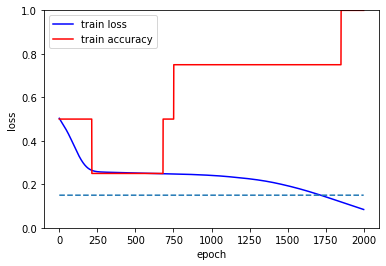

1/1 [==============================] - 0s 58ms/step
[[0.19231367]
 [0.764049  ]
 [0.76418954]
 [0.43320656]]


In [214]:
# GlorotNormal elu
initializer = tf.keras.initializers.GlorotNormal() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

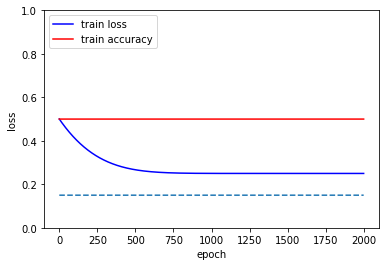

1/1 [==============================] - 0s 60ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


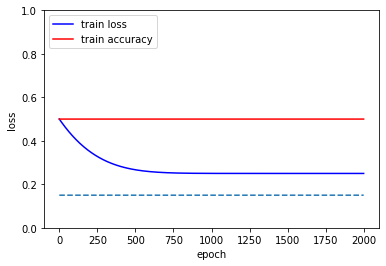

1/1 [==============================] - 0s 55ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


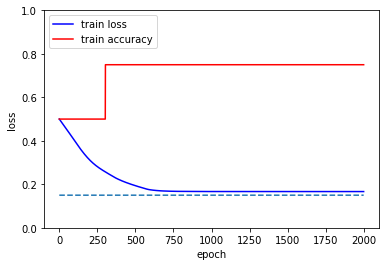

1/1 [==============================] - 0s 53ms/step
[[0.33337682]
 [0.33337682]
 [0.9999869 ]
 [0.33337682]]


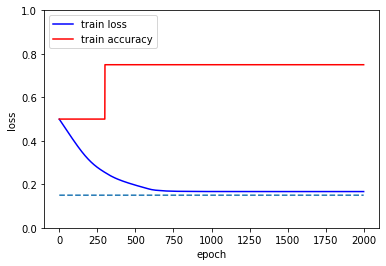

1/1 [==============================] - 0s 66ms/step
[[0.33358732]
 [0.99992025]
 [0.33358732]
 [0.33358732]]


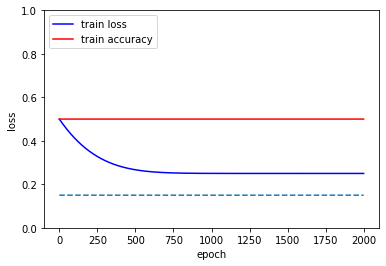

1/1 [==============================] - 0s 46ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


In [215]:
# GlorotNormal relu
initializer = tf.keras.initializers.GlorotNormal() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

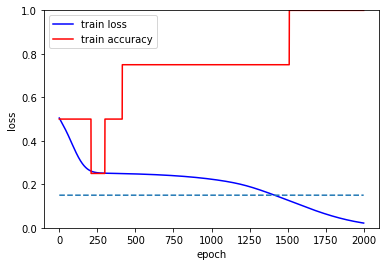

1/1 [==============================] - 0s 50ms/step
[[0.11138039]
 [0.88541085]
 [0.88596934]
 [0.21933907]]


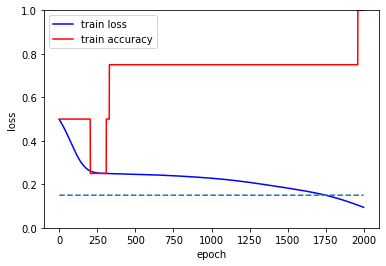

1/1 [==============================] - 0s 49ms/step
[[0.11229698]
 [0.73647225]
 [0.7385561 ]
 [0.47561067]]


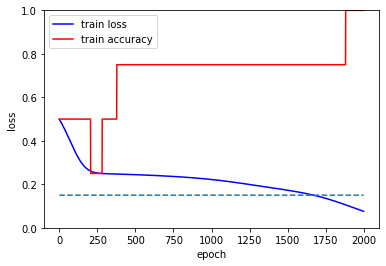

1/1 [==============================] - 0s 47ms/step
[[0.11889842]
 [0.77026683]
 [0.76453596]
 [0.42423385]]


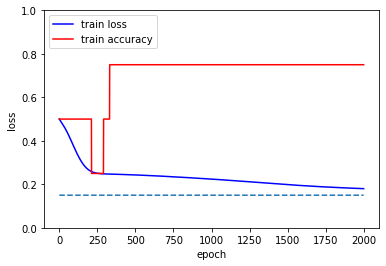

1/1 [==============================] - 0s 47ms/step
[[0.07549123]
 [0.6313372 ]
 [0.63299257]
 [0.66594756]]


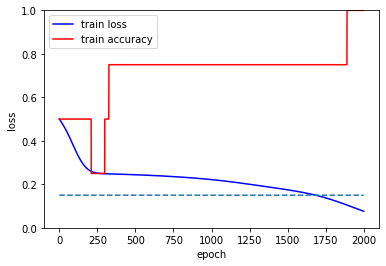

1/1 [==============================] - 0s 46ms/step
[[0.11819069]
 [0.76723284]
 [0.7693333 ]
 [0.42722267]]


In [216]:
# GlorotNormal tanh
initializer = tf.keras.initializers.GlorotNormal() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

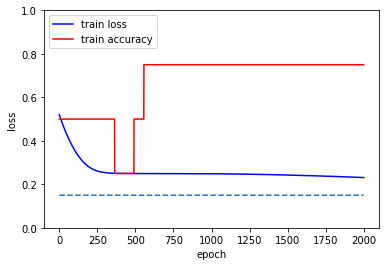

1/1 [==============================] - 0s 48ms/step
[[0.39704302]
 [0.5367376 ]
 [0.5377585 ]
 [0.58132523]]


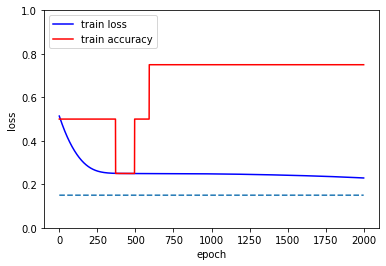

1/1 [==============================] - 0s 52ms/step
[[0.4133259 ]
 [0.53625983]
 [0.53726536]
 [0.5624971 ]]


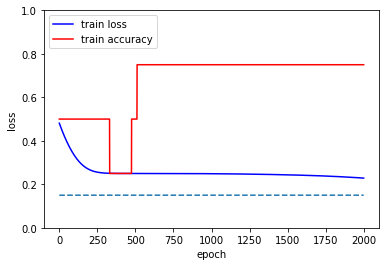

1/1 [==============================] - 0s 55ms/step
[[0.38822275]
 [0.5367799 ]
 [0.53588665]
 [0.57761234]]


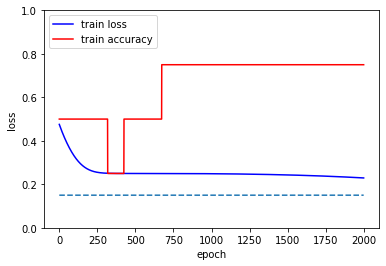

1/1 [==============================] - 0s 46ms/step
[[0.38172936]
 [0.53877914]
 [0.537575  ]
 [0.58712196]]


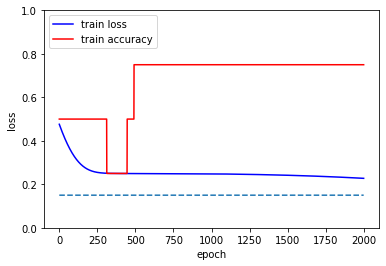

1/1 [==============================] - 0s 47ms/step
[[0.37525585]
 [0.5419928 ]
 [0.53926206]
 [0.5891455 ]]


In [217]:
# GlorotUniform sigmoid
initializer = tf.keras.initializers.GlorotUniform() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

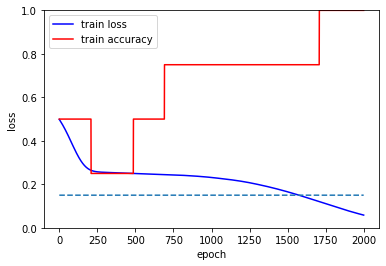

1/1 [==============================] - 0s 47ms/step
[[0.15745908]
 [0.8078376 ]
 [0.80720633]
 [0.36621034]]


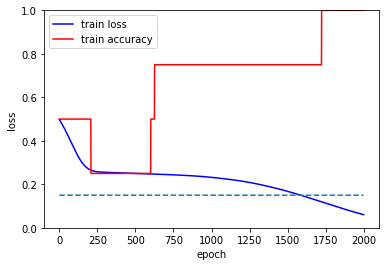

1/1 [==============================] - 0s 54ms/step
[[0.15865473]
 [0.80370444]
 [0.8037214 ]
 [0.37241668]]


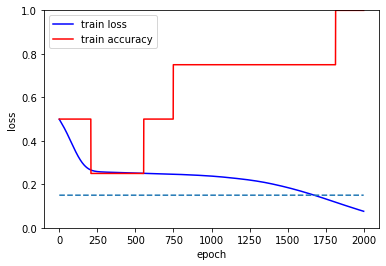

1/1 [==============================] - 0s 52ms/step
[[0.17659482]
 [0.77694196]
 [0.77609336]
 [0.41462687]]


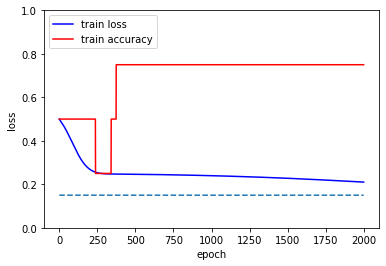

1/1 [==============================] - 0s 47ms/step
[[0.17789353]
 [0.57759   ]
 [0.5787691 ]
 [0.67322475]]


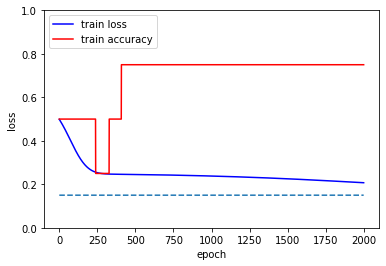

1/1 [==============================] - 0s 64ms/step
[[0.1601983 ]
 [0.57624066]
 [0.58960795]
 [0.6747972 ]]


In [218]:
# GlorotUniform elu
initializer = tf.keras.initializers.GlorotUniform() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

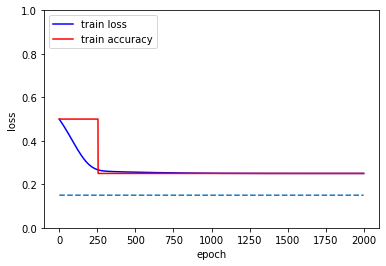

1/1 [==============================] - 0s 49ms/step
[[0.4992624 ]
 [0.4998989 ]
 [0.49991256]
 [0.5005491 ]]


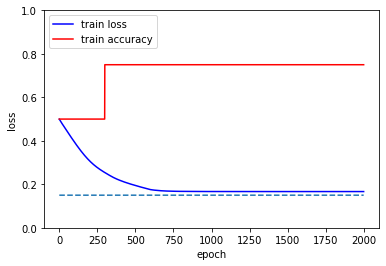

1/1 [==============================] - 0s 56ms/step
[[0.33336943]
 [0.99998826]
 [0.33336943]
 [0.33336943]]


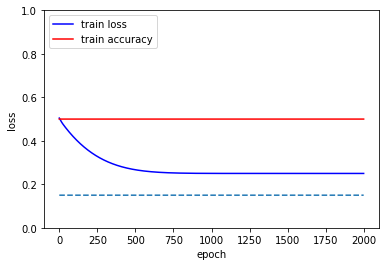

1/1 [==============================] - 0s 54ms/step
[[0.49999663]
 [0.49999663]
 [0.49999663]
 [0.49999663]]


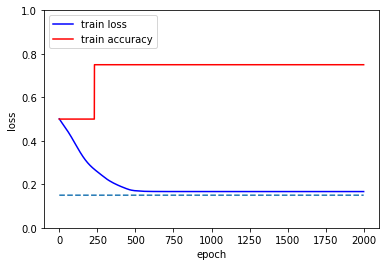

1/1 [==============================] - 0s 46ms/step
[[0.3333309]
 [0.3333309]
 [1.0000012]
 [0.3333309]]


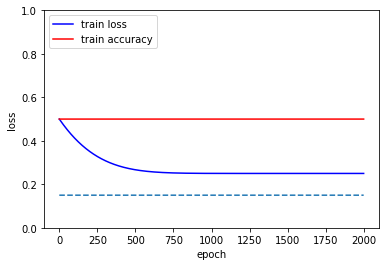

1/1 [==============================] - 0s 47ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


In [219]:
# GlorotUniform relu
initializer = tf.keras.initializers.GlorotUniform() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

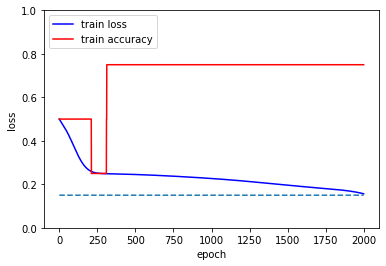

1/1 [==============================] - 0s 53ms/step
[[0.07333665]
 [0.6539228 ]
 [0.6539365 ]
 [0.6165069 ]]


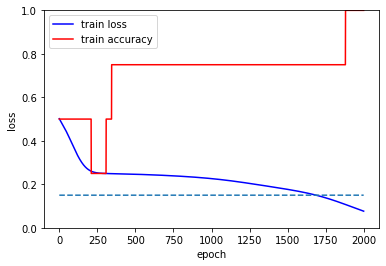

1/1 [==============================] - 0s 53ms/step
[[0.12904626]
 [0.7672615 ]
 [0.765776  ]
 [0.423239  ]]


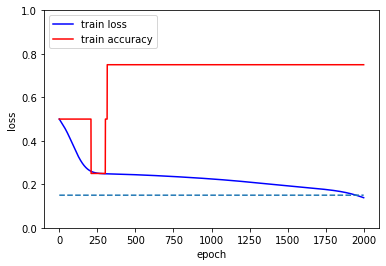

1/1 [==============================] - 0s 48ms/step
[[0.08665664]
 [0.679757  ]
 [0.67747736]
 [0.5821188 ]]


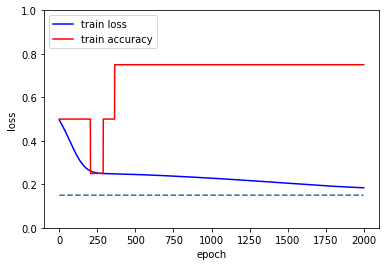

1/1 [==============================] - 0s 45ms/step
[[0.09568501]
 [0.62946534]
 [0.62128204]
 [0.6677913 ]]


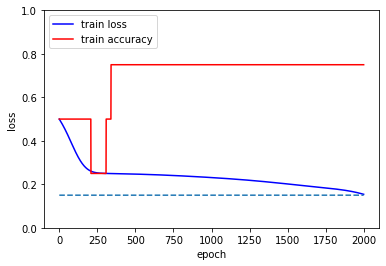

1/1 [==============================] - 0s 53ms/step
[[0.08942385]
 [0.6570776 ]
 [0.65119547]
 [0.606604  ]]


In [220]:
# GlorotUniform tanh
initializer = tf.keras.initializers.GlorotUniform() #Xavier
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

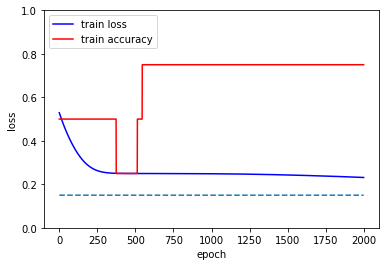

1/1 [==============================] - 0s 55ms/step
[[0.39947832]
 [0.53595585]
 [0.5360932 ]
 [0.5791238 ]]


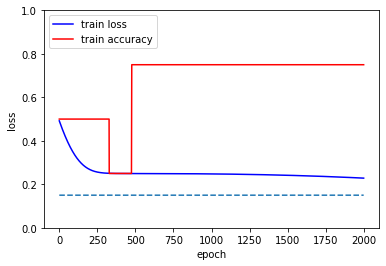

1/1 [==============================] - 0s 50ms/step
[[0.3825191 ]
 [0.53890795]
 [0.5391372 ]
 [0.58498377]]


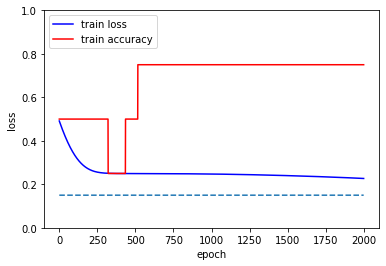

1/1 [==============================] - 0s 66ms/step
[[0.3761924 ]
 [0.54191166]
 [0.54362035]
 [0.5896904 ]]


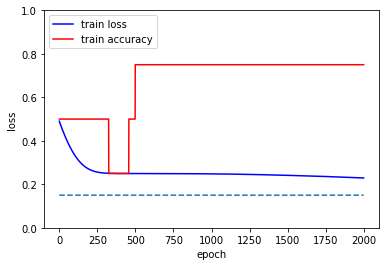

1/1 [==============================] - 0s 48ms/step
[[0.38587835]
 [0.5395033 ]
 [0.54030156]
 [0.5862249 ]]


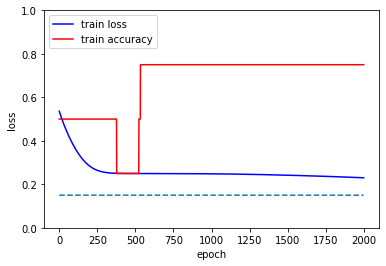

1/1 [==============================] - 0s 48ms/step
[[0.39418653]
 [0.5393181 ]
 [0.5391701 ]
 [0.5830261 ]]


In [221]:
# HeNormal sigmoid
initializer = tf.keras.initializers.HeNormal() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

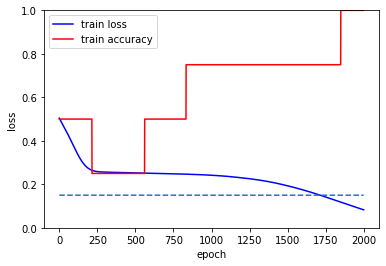

1/1 [==============================] - 0s 48ms/step
[[0.18310289]
 [0.7639103 ]
 [0.76339513]
 [0.43004978]]


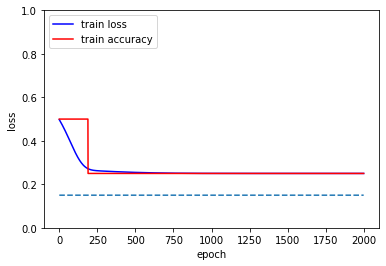

1/1 [==============================] - 0s 44ms/step
[[0.49999434]
 [0.4999991 ]
 [0.49999917]
 [0.50000393]]


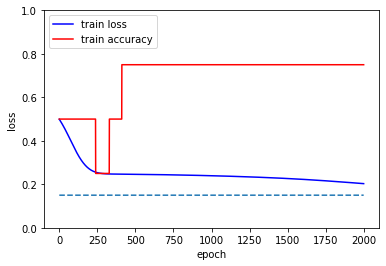

1/1 [==============================] - 0s 54ms/step
[[0.14499688]
 [0.5893459 ]
 [0.57998693]
 [0.6678836 ]]


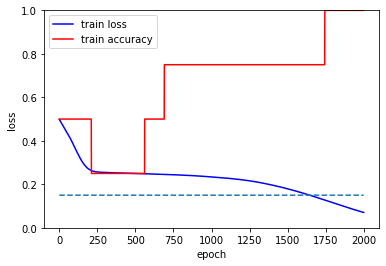

1/1 [==============================] - 0s 70ms/step
[[0.18985787]
 [0.7856688 ]
 [0.7852639 ]
 [0.39133653]]


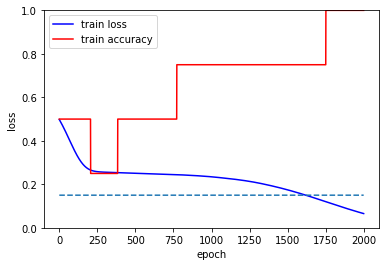

1/1 [==============================] - 0s 59ms/step
[[0.16338748]
 [0.79286015]
 [0.7918223 ]
 [0.38471502]]


In [222]:
# HeNormal elu
initializer = tf.keras.initializers.HeNormal() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

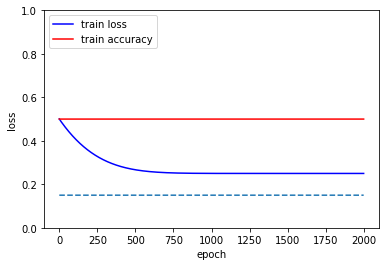

1/1 [==============================] - 0s 52ms/step
[[0.49999666]
 [0.49999666]
 [0.49999666]
 [0.49999666]]


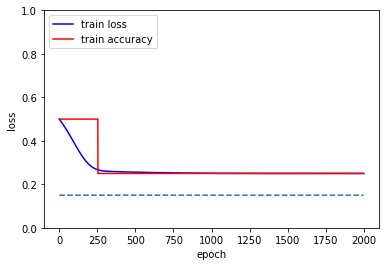

1/1 [==============================] - 0s 50ms/step
[[0.49940938]
 [0.49992108]
 [0.4999256 ]
 [0.5004373 ]]


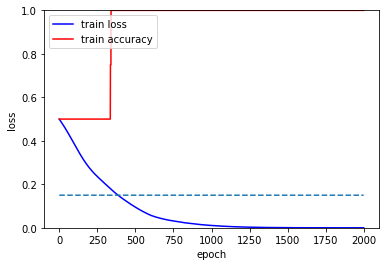

1/1 [==============================] - 0s 67ms/step
[[0.00375647]
 [0.99898326]
 [0.9989778 ]
 [0.00375647]]


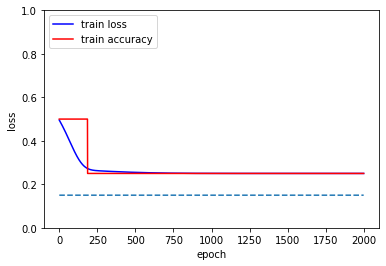

1/1 [==============================] - 0s 46ms/step
[[0.4999949 ]
 [0.49999925]
 [0.49999923]
 [0.5000036 ]]


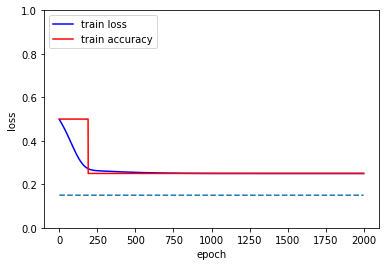

1/1 [==============================] - 0s 46ms/step
[[0.49999297]
 [0.49999893]
 [0.49999893]
 [0.5000049 ]]


In [223]:
# HeNormal relu
initializer = tf.keras.initializers.HeNormal() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

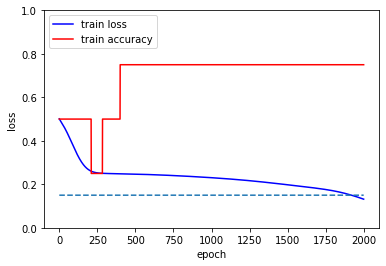

1/1 [==============================] - 0s 57ms/step
[[0.10579568]
 [0.68033725]
 [0.6878491 ]
 [0.5610685 ]]


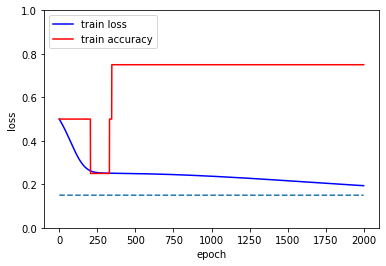

1/1 [==============================] - 0s 50ms/step
[[0.15506773]
 [0.61060905]
 [0.61126924]
 [0.6697461 ]]


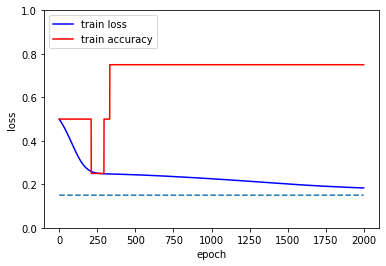

1/1 [==============================] - 0s 55ms/step
[[0.08932838]
 [0.63089293]
 [0.62738144]
 [0.67058426]]


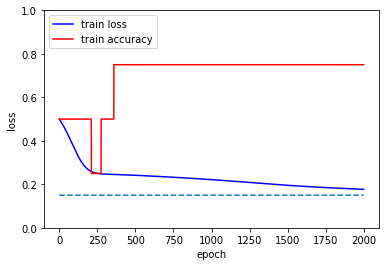

1/1 [==============================] - 0s 47ms/step
[[0.06545758]
 [0.6323868 ]
 [0.63895345]
 [0.6614771 ]]


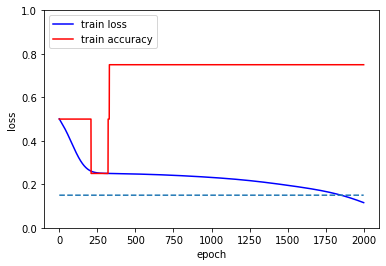

1/1 [==============================] - 0s 49ms/step
[[0.12160045]
 [0.70430195]
 [0.70422924]
 [0.5219246 ]]


In [224]:
# HeNormal tanh
initializer = tf.keras.initializers.HeNormal() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

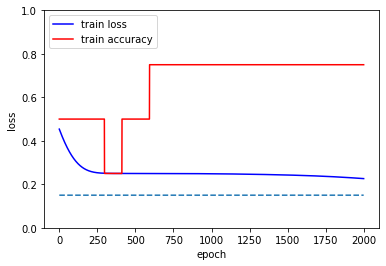

1/1 [==============================] - 0s 50ms/step
[[0.38087884]
 [0.5404088 ]
 [0.53901404]
 [0.5796565 ]]


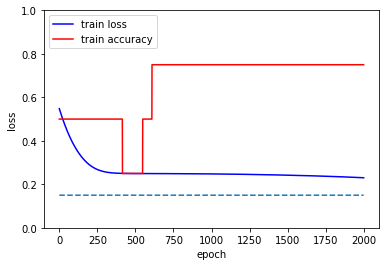

1/1 [==============================] - 0s 46ms/step
[[0.41378397]
 [0.5360798 ]
 [0.53490543]
 [0.56385326]]


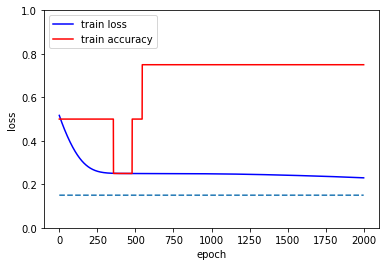

1/1 [==============================] - 0s 54ms/step
[[0.39170608]
 [0.53839135]
 [0.5397281 ]
 [0.58373064]]


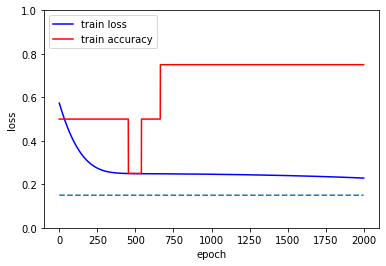

1/1 [==============================] - 0s 50ms/step
[[0.40083748]
 [0.53569734]
 [0.5405616 ]
 [0.57197595]]


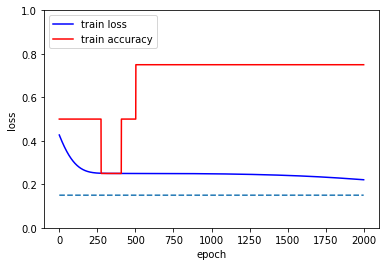

1/1 [==============================] - 0s 45ms/step
[[0.3837892 ]
 [0.5476802 ]
 [0.54913145]
 [0.5732401 ]]


In [225]:
# HeUniform sigmoid
initializer = tf.keras.initializers.HeUniform() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

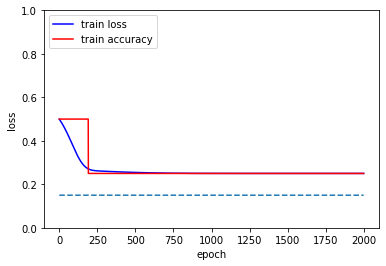

1/1 [==============================] - 0s 48ms/step
[[0.49999574]
 [0.49999943]
 [0.49999943]
 [0.5000031 ]]


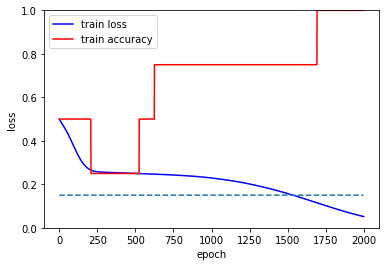

1/1 [==============================] - 0s 48ms/step
[[0.13792402]
 [0.82215476]
 [0.8215871 ]
 [0.35146767]]


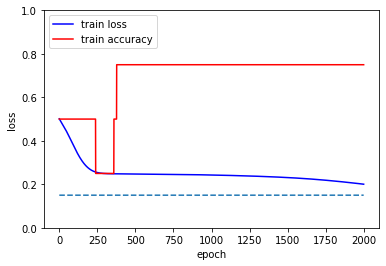

1/1 [==============================] - 0s 47ms/step
[[0.15610656]
 [0.57942736]
 [0.585587  ]
 [0.6547197 ]]


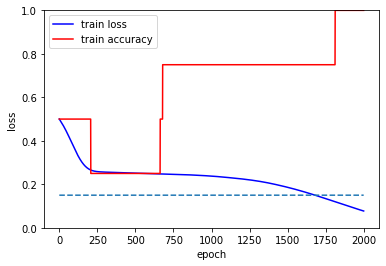

1/1 [==============================] - 0s 83ms/step
[[0.1847263 ]
 [0.77510935]
 [0.7748283 ]
 [0.4155747 ]]


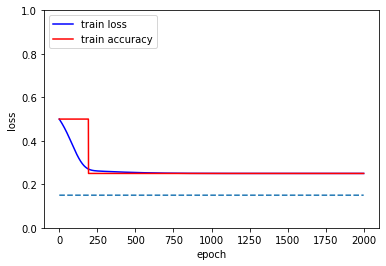

1/1 [==============================] - 0s 47ms/step
[[0.49999684]
 [0.49999964]
 [0.49999964]
 [0.5000025 ]]


In [226]:
# HeUniform elu
initializer = tf.keras.initializers.HeUniform() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='elu', epochs=2000, optimizer='adam'))

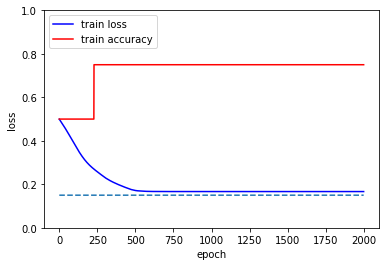

1/1 [==============================] - 0s 46ms/step
[[0.3333316]
 [0.3333316]
 [1.0000012]
 [0.3333316]]


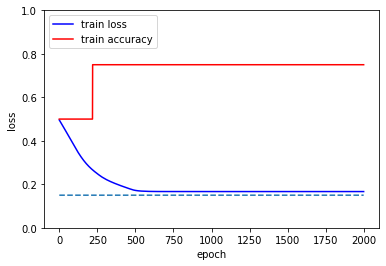

1/1 [==============================] - 0s 54ms/step
[[0.3333317]
 [0.3333317]
 [1.0000012]
 [0.3333317]]


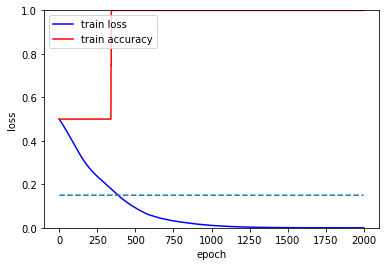

1/1 [==============================] - 0s 58ms/step
[[0.00396634]
 [0.9989073 ]
 [0.998868  ]
 [0.00396202]]


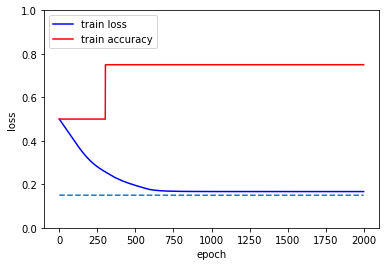

1/1 [==============================] - 0s 52ms/step
[[0.3333697 ]
 [0.99998844]
 [0.3333697 ]
 [0.3333697 ]]


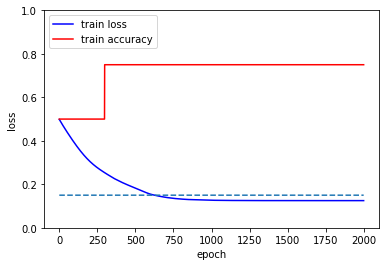

1/1 [==============================] - 0s 47ms/step
[[4.9935865e-01]
 [4.9935865e-01]
 [1.0000179e+00]
 [2.3752451e-05]]


In [227]:
# HeUniform relu
initializer = tf.keras.initializers.HeUniform() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='relu', epochs=2000, optimizer='adam'))

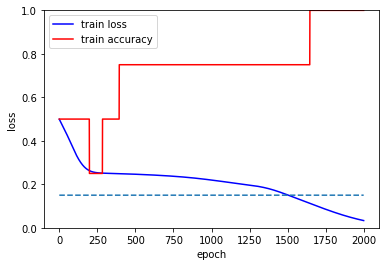

1/1 [==============================] - 0s 44ms/step
[[0.10906269]
 [0.8533873 ]
 [0.85475194]
 [0.27934653]]


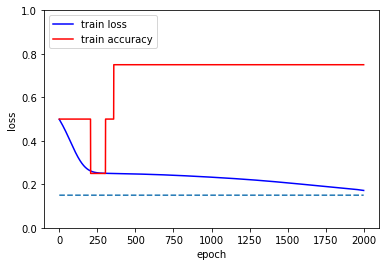

1/1 [==============================] - 0s 50ms/step
[[0.08867621]
 [0.634421  ]
 [0.62917745]
 [0.63849306]]


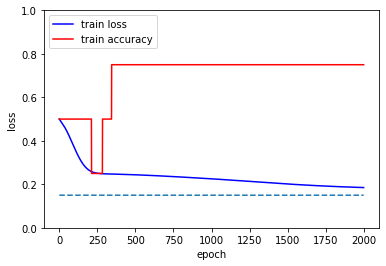

1/1 [==============================] - 0s 52ms/step
[[0.10079792]
 [0.6312988 ]
 [0.6261327 ]
 [0.6739063 ]]


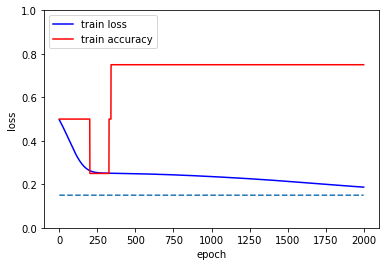

1/1 [==============================] - 0s 47ms/step
[[0.11804098]
 [0.6169892 ]
 [0.6167551 ]
 [0.6637964 ]]


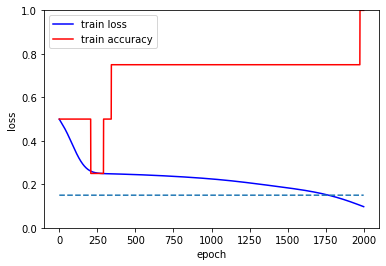

1/1 [==============================] - 0s 47ms/step
[[0.1102413]
 [0.737519 ]
 [0.7302508]
 [0.4838647]]


In [228]:
# HeUniform tanh
initializer = tf.keras.initializers.HeUniform() #He
for i in range(0,5):
  print(xor_practice(initializer, activation='tanh', epochs=2000, optimizer='adam'))

In [228]:
initializer1 = keras.initializers.RandomNormal(mean=0, stddev=1.)
initializer2 = keras.initializers.RandomUniform(minval=0,maxval=1.)
initializer3 = keras.initializers.TruncatedNormal(mean=0, stddev=1.)
initializer4 = keras.initializers.Zeros()
initializer5 = keras.initializers.Ones()
initializer6 = keras.initializers.GlorotNormal() #Xavier
initializer7 = keras.initializers.GlorotUniform() #Xavier
initializer8 = keras.initializers.HeNormal() #He
initializer9 = keras.initializers.HeUniform() #He
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice(activation, epochs, optimizer):
  fig = plt.figure(figsize=(30, 15))
  for i in range(9):
    globals()[f'ax{i+1}'] = fig.add_subplot(3, 3, i+1)
  for i in range(9):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    ip = Input(shape=(2,))
    n = Dense(2, activation=activation, kernel_initializer=globals()[f'initializer{i+1}'])(ip)
    n = Dense(1, activation='linear', kernel_initializer=globals()[f'initializer{i+1}'])(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    globals()[f'ax{i+1}'].plot(hist.history['loss'], 'y', label='train loss', c='blue')
    globals()[f'ax{i+1}'].plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    initial_name = ['RandomNormal', 'RandomUniform', 'TruncatedNormal', 'Zeros', 'Ones', 'GlorotNormal', 'GlorotUniform', 'HeNormal', 'HeUniform']
    globals()[f'ax{i+1}'].set_title(f'{initial_name[i]} & {activation} & {optimizer}')
    globals()[f'ax{i+1}'].set_xlabel('epoch')
    globals()[f'ax{i+1}'].set_ylabel('loss')
    globals()[f'ax{i+1}'].legend(loc='upper left')
    globals()[f'ax{i+1}'].set_ylim(0, 1)
  plt.show()

In [232]:
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LayerNormalization
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y
ip = Input(shape=(2,))
n = Dense(2, activation='sigmoid')(ip)
n = Dense(2, activation='sigmoid')(n)
n = Dense(1, activation='sigmoid')(n)
model_a = Model(inputs=ip, outputs=n)
model_a.add(BatchNormalization())

AttributeError: ignored

In [234]:
# BatchNormalization 사용

from tensorflow import keras, initializers
initializer1 = keras.initializers.RandomNormal(mean=0, stddev=1.)
initializer2 = keras.initializers.RandomUniform(minval=0,maxval=1.)
initializer3 = keras.initializers.TruncatedNormal(mean=0, stddev=1.)
initializer4 = keras.initializers.Zeros()
initializer5 = keras.initializers.Ones()
initializer6 = keras.initializers.GlorotNormal() #Xavier
initializer7 = keras.initializers.GlorotUniform() #Xavier
initializer8 = keras.initializers.HeNormal() #He
initializer9 = keras.initializers.HeUniform() #He
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice(activation, epochs, optimizer):
  fig = plt.figure(figsize=(30, 15))
  for i in range(9):
    globals()[f'ax{i+1}'] = fig.add_subplot(3, 3, i+1)
  for i in range(9):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    ip = Input(shape=(2,))
    n = BatchNormalization()(ip)
    n = Dense(2, activation=activation, kernel_initializer=globals()[f'initializer{i+1}'])(n)
    n = BatchNormalization()(n)
    n = Dense(1, activation='linear', kernel_initializer=globals()[f'initializer{i+1}'])(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    globals()[f'ax{i+1}'].plot(hist.history['loss'], 'y', label='train loss', c='blue')
    globals()[f'ax{i+1}'].plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    initial_name = ['RandomNormal', 'RandomUniform', 'TruncatedNormal', 'Zeros', 'Ones', 'GlorotNormal', 'GlorotUniform', 'HeNormal', 'HeUniform']
    globals()[f'ax{i+1}'].set_title(f'{initial_name[i]} & {activation} & {optimizer}')
    globals()[f'ax{i+1}'].set_xlabel('epoch')
    globals()[f'ax{i+1}'].set_ylabel('loss')
    globals()[f'ax{i+1}'].legend(loc='upper left')
    globals()[f'ax{i+1}'].set_ylim(0, 1)
  plt.show()

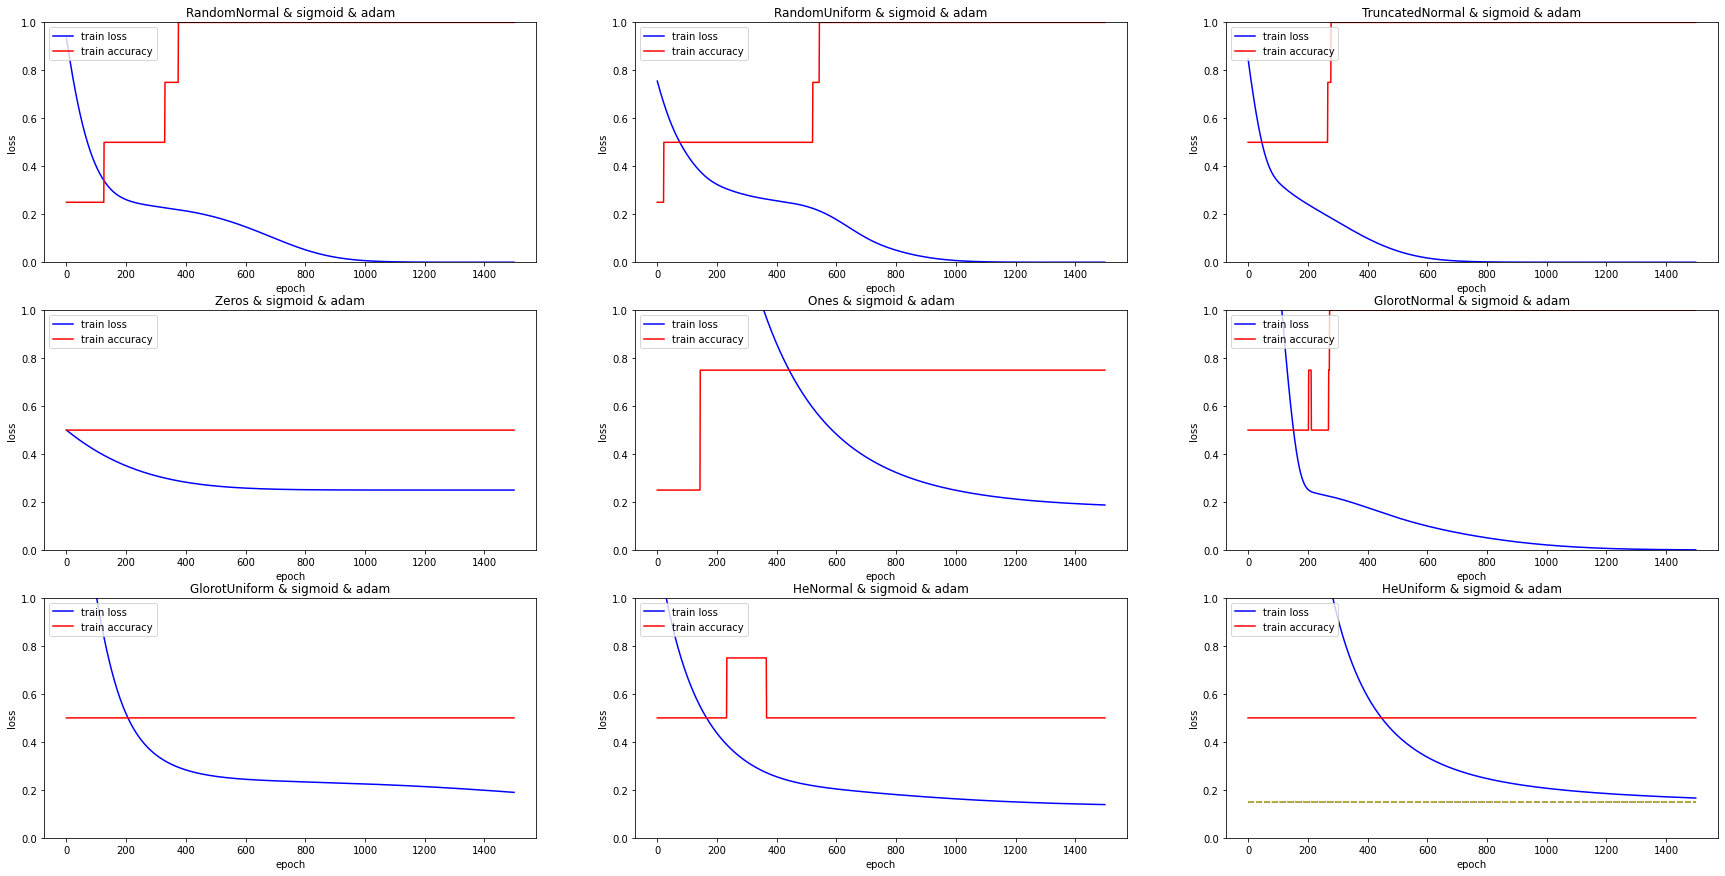

In [236]:
xor_practice(activation='sigmoid', epochs=1500, optimizer='adam')

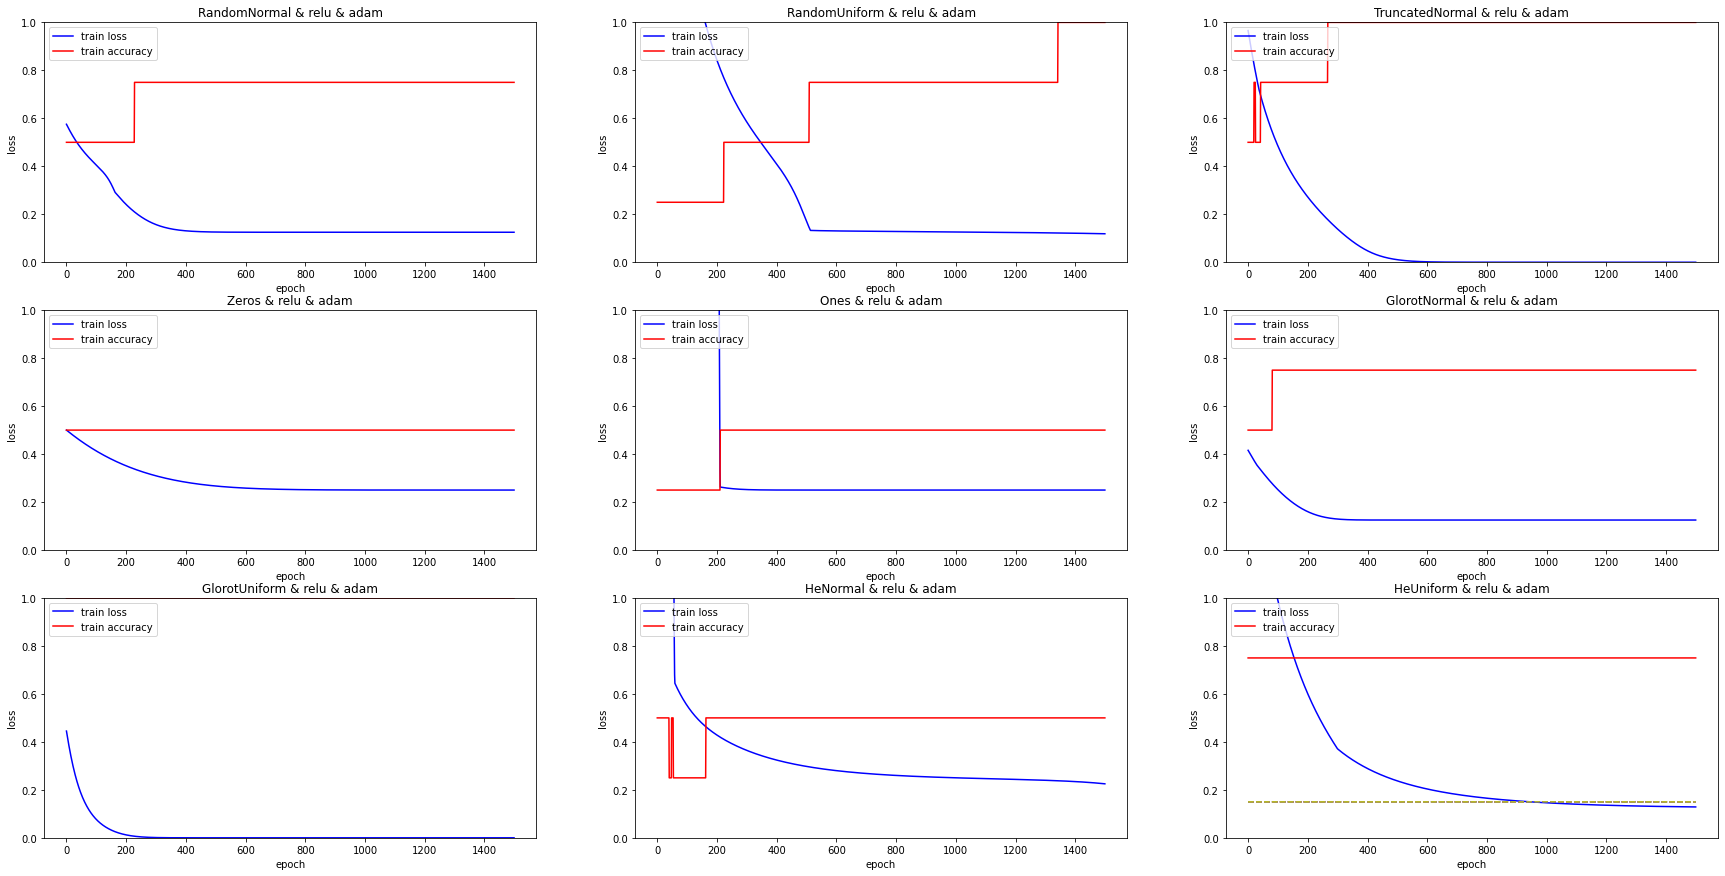

In [237]:
xor_practice(activation='relu', epochs=1500, optimizer='adam')

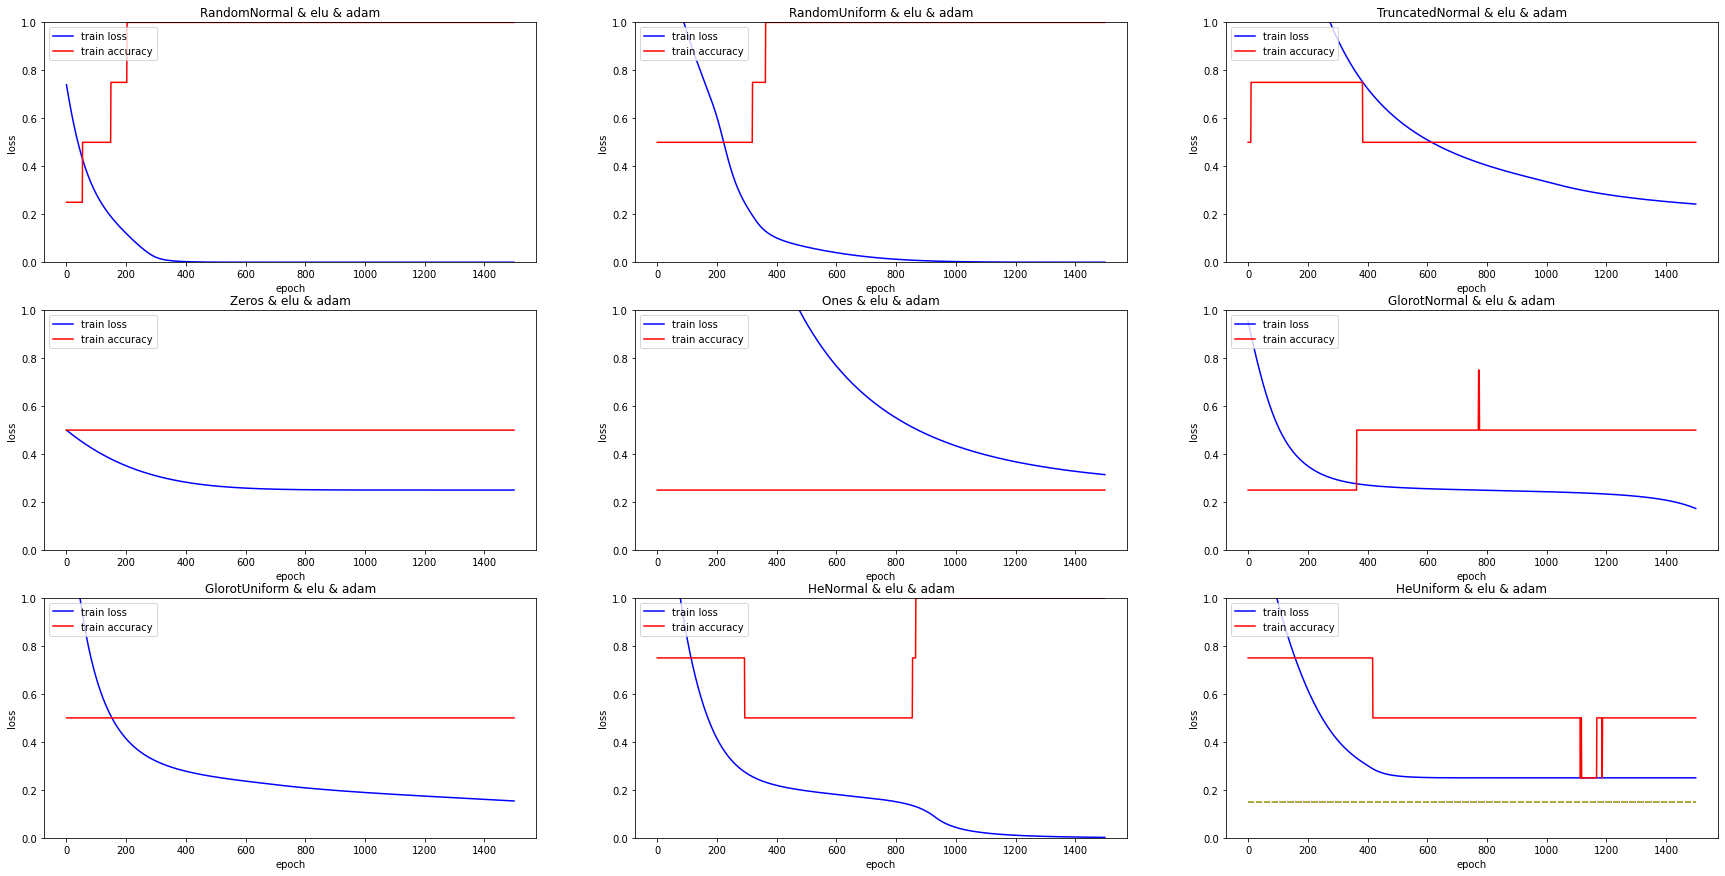

In [238]:
xor_practice(activation='elu', epochs=1500, optimizer='adam')

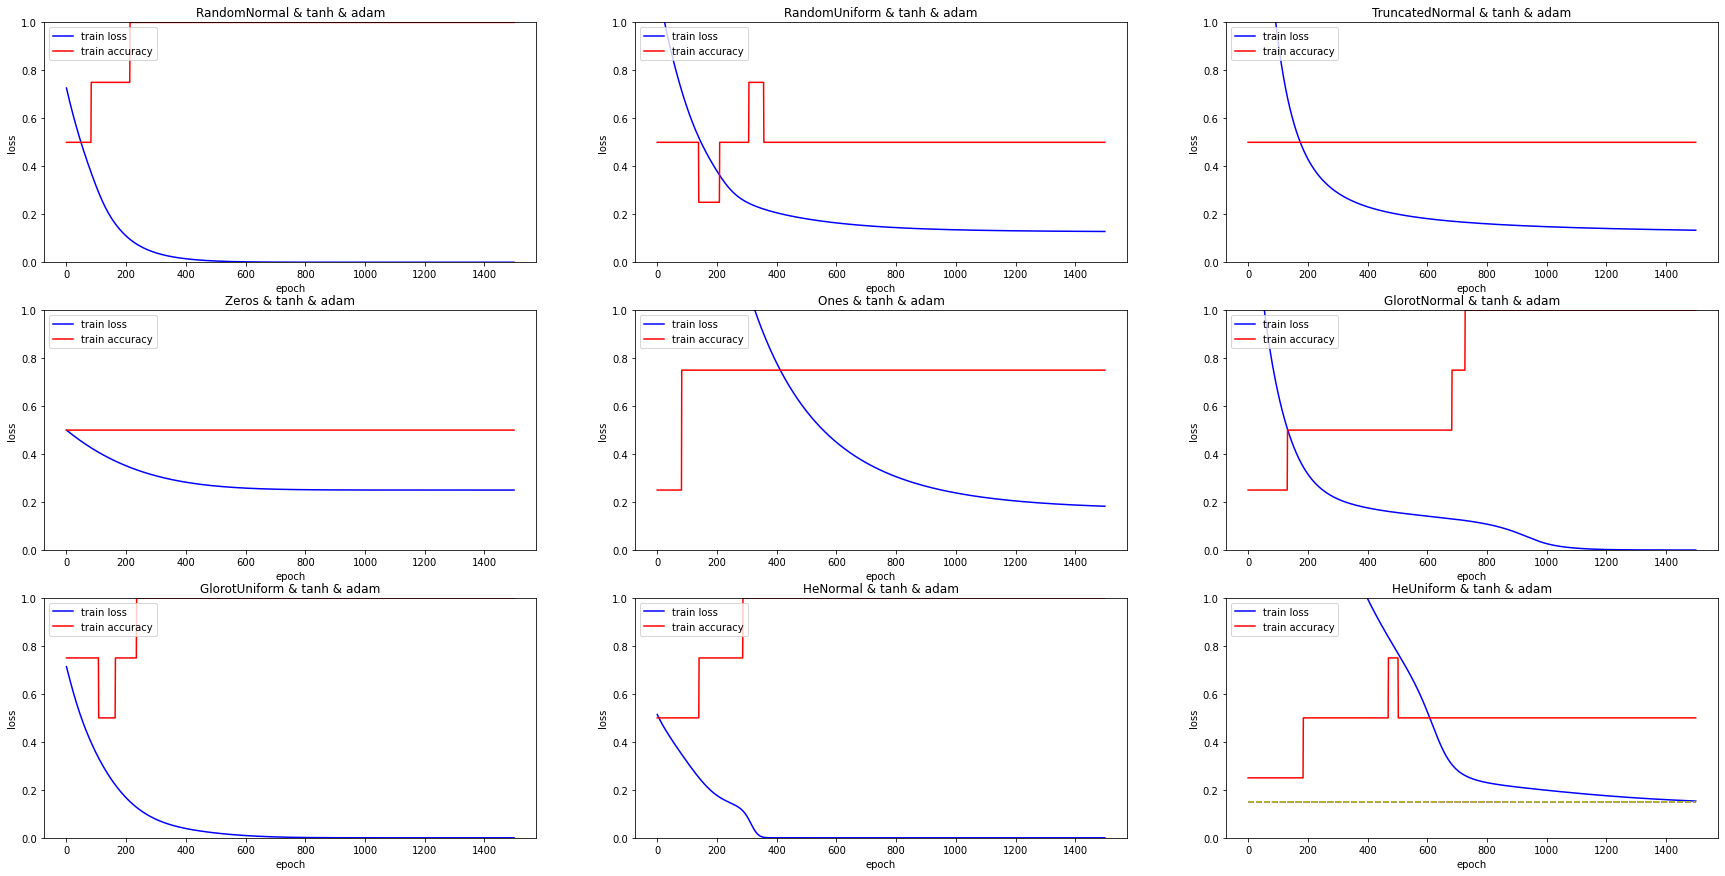

In [239]:
xor_practice(activation='tanh', epochs=1500, optimizer='adam')

# BatchNormalization()

---
성능이 많이 좋아짐



In [242]:
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
def xor_practice1(initializer, activation, epochs, optimizer):
    xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
    XOR = pd.DataFrame(xor)
    X = XOR.drop('y', axis=1)
    y = XOR.y
    ip = Input(shape=(2,))
    n = BatchNormalization()(ip)
    n = Dense(2, activation=activation, kernel_initializer=initializer)(n)
    n = BatchNormalization()(n)
    n = Dense(1, activation='linear', kernel_initializer=initializer)(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer=optimizer, metrics='accuracy')
    hist = model.fit(X, y, epochs=epochs, verbose=0)
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss', c='blue')
    loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy', c='red')
    plt.plot(range(epochs), [0.15 for _ in range(epochs)], linestyle='--')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    loss_ax.set_ylim(0, 1)
    plt.show()
    return model.predict(X)



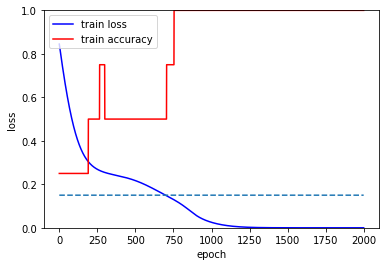

1/1 [==============================] - 0s 84ms/step
[[-0.0015116 ]
 [ 0.9988674 ]
 [ 0.9981092 ]
 [-0.00156322]]


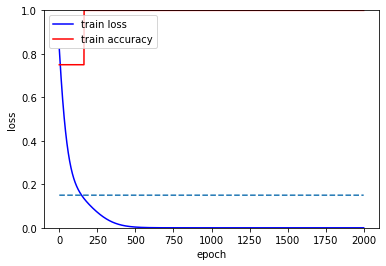

1/1 [==============================] - 0s 105ms/step
[[-2.2515655e-05]
 [ 9.9997091e-01]
 [ 9.9997306e-01]
 [-2.2217631e-05]]


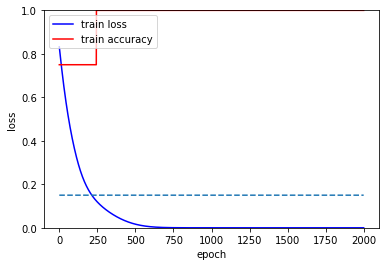

1/1 [==============================] - 0s 88ms/step
[[2.6106834e-05]
 [1.0000211e+00]
 [1.0000210e+00]
 [2.3841858e-05]]


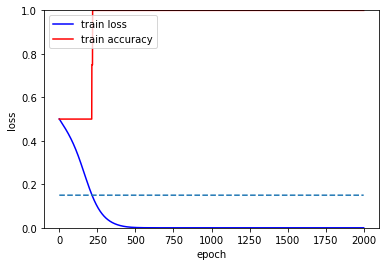

1/1 [==============================] - 0s 76ms/step
[[ 1.2040138e-05]
 [ 9.9999976e-01]
 [ 9.9999428e-01]
 [-1.1801720e-05]]


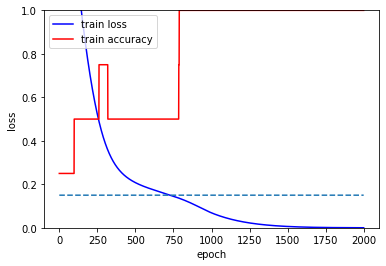

1/1 [==============================] - 0s 97ms/step
[[-0.02771294]
 [ 0.9448867 ]
 [ 0.93901396]
 [-0.02564205]]


In [243]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(0,5):
  print(xor_practice1(initializer, activation='sigmoid', epochs=2000, optimizer='adam'))

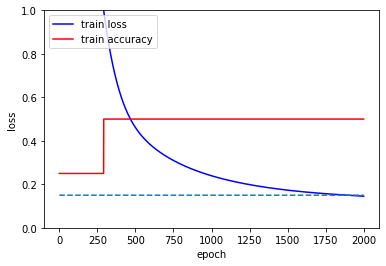

1/1 [==============================] - 0s 90ms/step
[[-0.02954478]
 [ 0.9084272 ]
 [ 0.47300678]
 [ 0.55105954]]


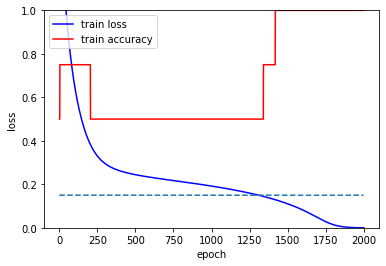

1/1 [==============================] - 0s 79ms/step
[[-0.03209727]
 [ 1.0722322 ]
 [ 1.0280515 ]
 [ 0.16511418]]


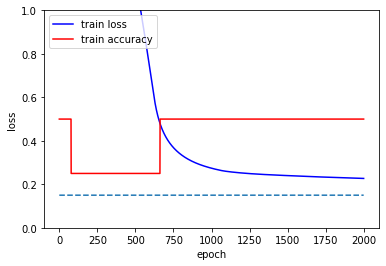

1/1 [==============================] - 0s 80ms/step
[[0.56303954]
 [0.39360267]
 [0.6464903 ]
 [0.3176592 ]]


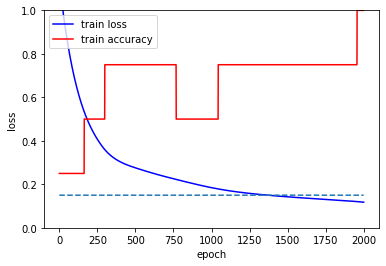

1/1 [==============================] - 0s 89ms/step
[[ 0.49480605]
 [ 0.9737831 ]
 [ 0.52453935]
 [-0.01739872]]


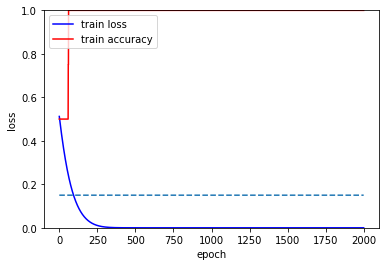

1/1 [==============================] - 0s 85ms/step
[[7.5548887e-06]
 [9.9999928e-01]
 [1.0000008e+00]
 [4.6193600e-07]]


In [244]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(5):
  print(xor_practice1(initializer, activation='elu', epochs=2000, optimizer='adam'))

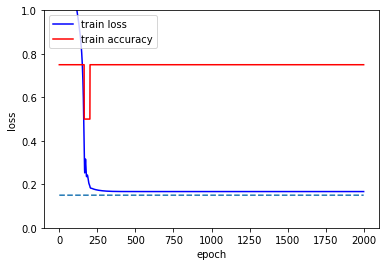

1/1 [==============================] - 0s 84ms/step
[[6.6666692e-01]
 [6.6666692e-01]
 [6.6666692e-01]
 [8.6426735e-07]]


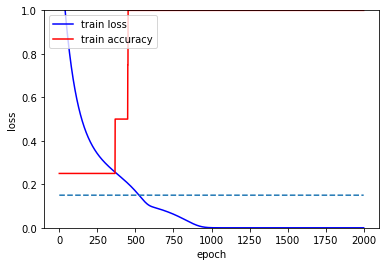

1/1 [==============================] - 0s 89ms/step
[[1.2740493e-05]
 [1.0000062e+00]
 [1.0000117e+00]
 [1.8522143e-05]]


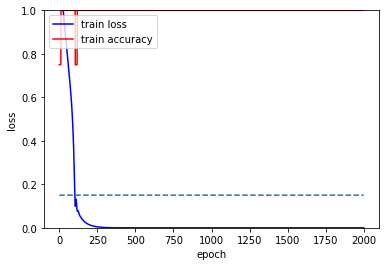

1/1 [==============================] - 0s 87ms/step
[[1.1488795e-05]
 [1.0000005e+00]
 [1.0000005e+00]
 [2.0712614e-06]]


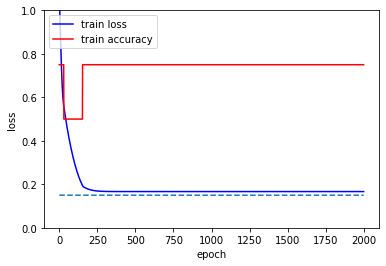

1/1 [==============================] - 0s 77ms/step
[[6.6666955e-01]
 [6.6666955e-01]
 [6.6666955e-01]
 [4.9620867e-06]]


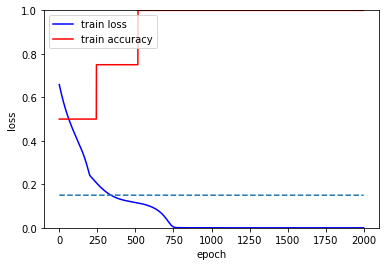

1/1 [==============================] - 0s 81ms/step
[[1.7732382e-05]
 [1.0000024e+00]
 [9.9999791e-01]
 [9.5069408e-06]]


In [245]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(5):
  print(xor_practice1(initializer, activation='relu', epochs=2000, optimizer='adam'))

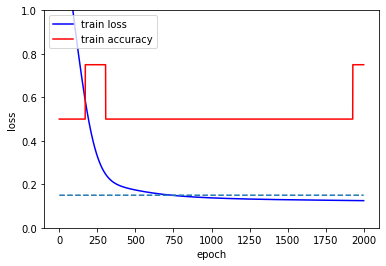

1/1 [==============================] - 0s 101ms/step
[[0.05475296]
 [1.0137187 ]
 [0.5112976 ]
 [0.51044416]]


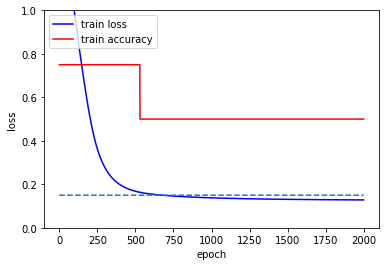

1/1 [==============================] - 0s 88ms/step
[[0.0196102 ]
 [0.49553275]
 [0.9973867 ]
 [0.5077957 ]]


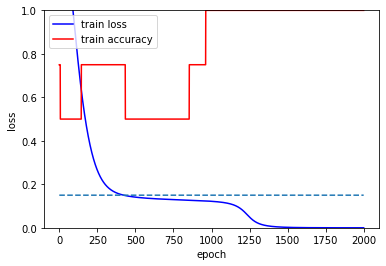

1/1 [==============================] - 0s 88ms/step
[[0.0416476 ]
 [1.0160623 ]
 [1.0177219 ]
 [0.00839625]]


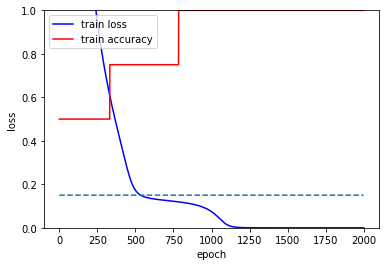

1/1 [==============================] - 0s 90ms/step
[[-1.5915930e-04]
 [ 9.9955446e-01]
 [ 1.0000035e+00]
 [-2.5115907e-04]]


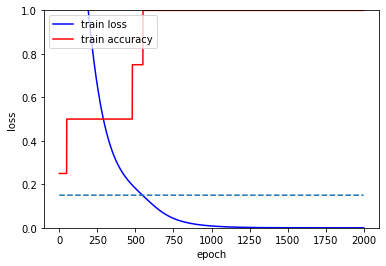

1/1 [==============================] - 0s 115ms/step
[[-0.00800024]
 [ 0.9900614 ]
 [ 0.9874826 ]
 [-0.00780223]]


In [246]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
for i in range(5):
  print(xor_practice1(initializer, activation='tanh', epochs=2000, optimizer='adam'))

In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [256]:
xor = {'x1':[0,0,1,1], 'x2':[0,1,0,1], 'y':[0,1,1,0]}
XOR = pd.DataFrame(xor)
X = XOR.drop('y', axis=1)
y = XOR.y

model = Sequential()
model.add(Dense(256, input_shape=(2,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
model.compile(loss='mse', optimizer='adam')
model.fit(X,y, epochs=2000, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 54ms/step


array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)